# 光学系统分析
## 光路网络
序列光学分析效率高，非序列光学则更适用于分布式合成孔径系统。我们采用有向无圈图（Directed acyclic graph, DAG）建立光路网络模型，作为序列光学分析的广义形式。

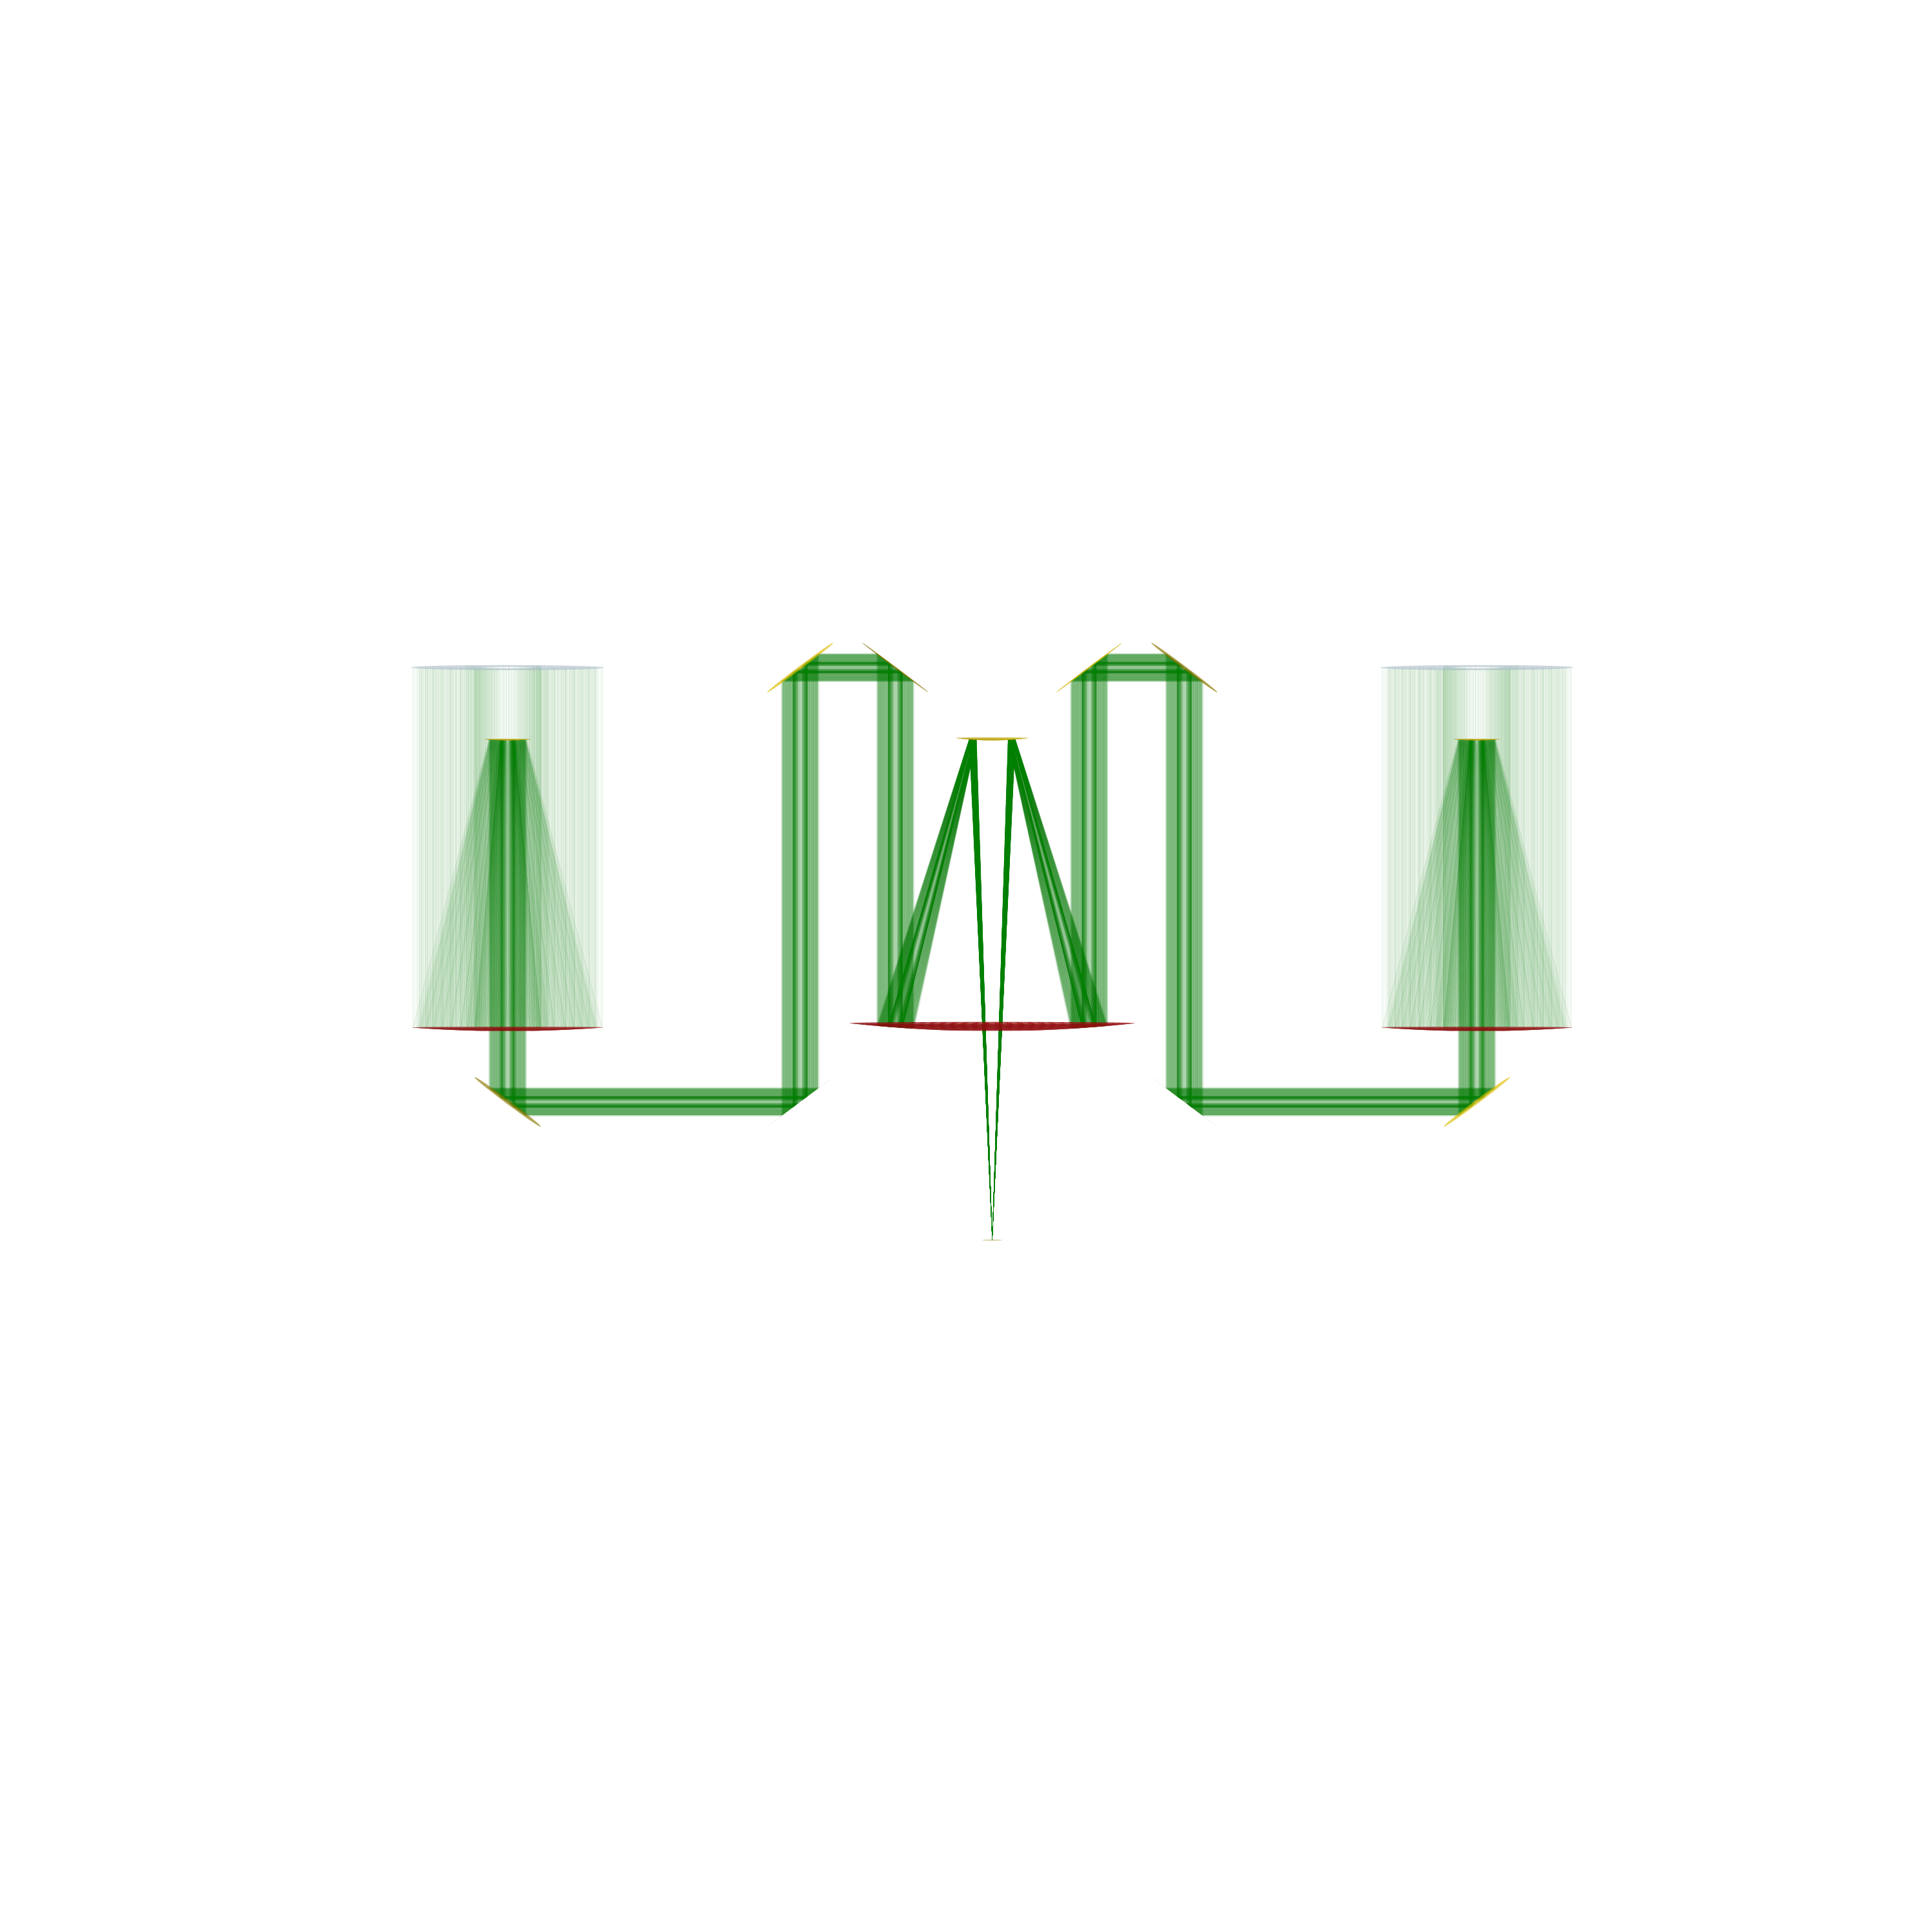

In [482]:
import pimms.optics as op
reload(op)
reload(op.lins)
# 创建简化的迈克尔逊恒星干涉仪模型，初始基线10米
sim=op.SIM(init_b=10.)
# 创建天顶无穷远光源
src=op.LightSource((0., 0., np.inf))
# 创建光路网络，并以上述光源作为参考光源，通过非序列光线追踪，确定光路，创建光路网络
opn=op.OpticalPathNetwork(sim, light_source=src)
p,q=src(sim.get_entrance(), 100, 1, sampling='crosshair')
pt,mt=sim.trace_network(q,opn)
tris,zs,extent=sim.draw(draw_virtual=True,view_angles=(0,-90),figure_size=(3000,3000),raytrace=pt)

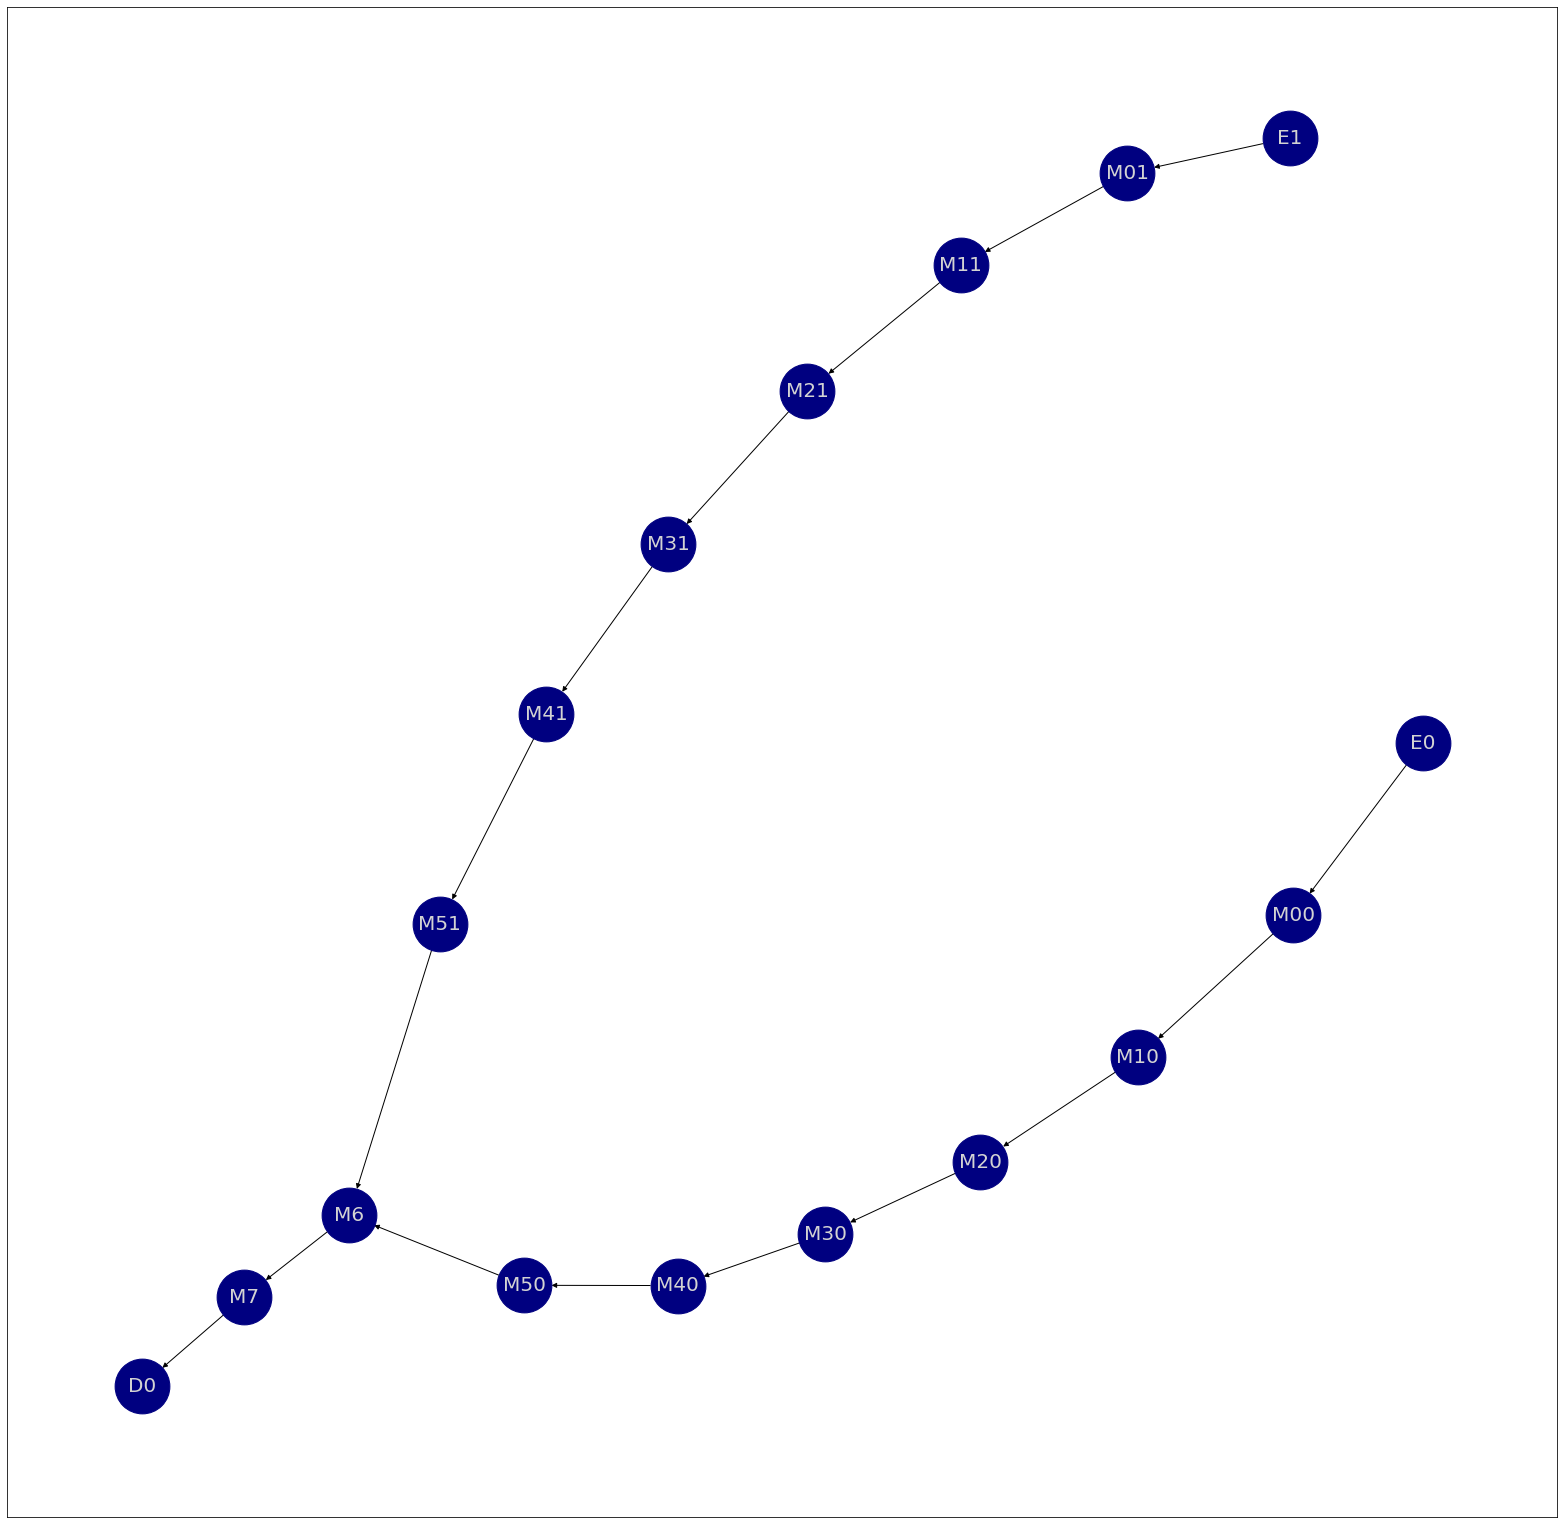

In [421]:
opn.draw(figure_size=(2000,2000),node_size=3000,font_size=20)

建立光路网络后，基于网络进行光线追踪，相比非序列光线追踪，可大幅度提升效率。

In [135]:
%timeit sim.trace(q)
%timeit sim.trace_network(q,opn)
pt0,mt0=sim.trace(q)
pt1,mt1=sim.trace_network(q,opn)

## 确定系统光阑

Aperture stops:
  M00
  M01
Effective area: 5.90E+00 square meter
Field stop(s):
  D0


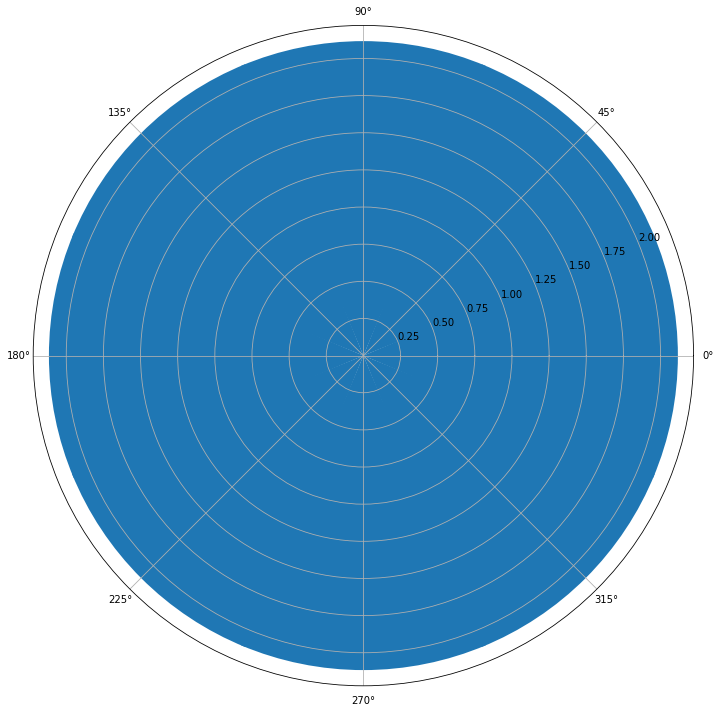

In [313]:
# 寻找系统孔径光阑
astops=opn.aperture_stop()
print("Aperture stops:")
for astop in astops:
    print("  {}".format(astop.name))
# 估算系统几何有效通光面积
area=opn.effective_area()
print("Effective area: {:.2E} square meter".format(area))
# 寻找系统视场光阑并估算视场
fstops,az,zmin,zmax=opn.field_stop(num_spokes=8)
z=np.rad2deg(.5*(zmin+zmax))*60.
print("Field stop(s):")
for fstop in fstops:
    print("  {}".format(fstop.name))
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='polar')
ax.bar(az,z)
# 绘制视场示意图，单位：角分
plt.tight_layout()

## 寻找入瞳、出瞳
在前述工具基础上，通过寻找孔径光阑在物方或像方的实像或者虚像，可以得到系统的入瞳或出瞳。
### 简单系统（卡塞格林系统）入瞳、出瞳

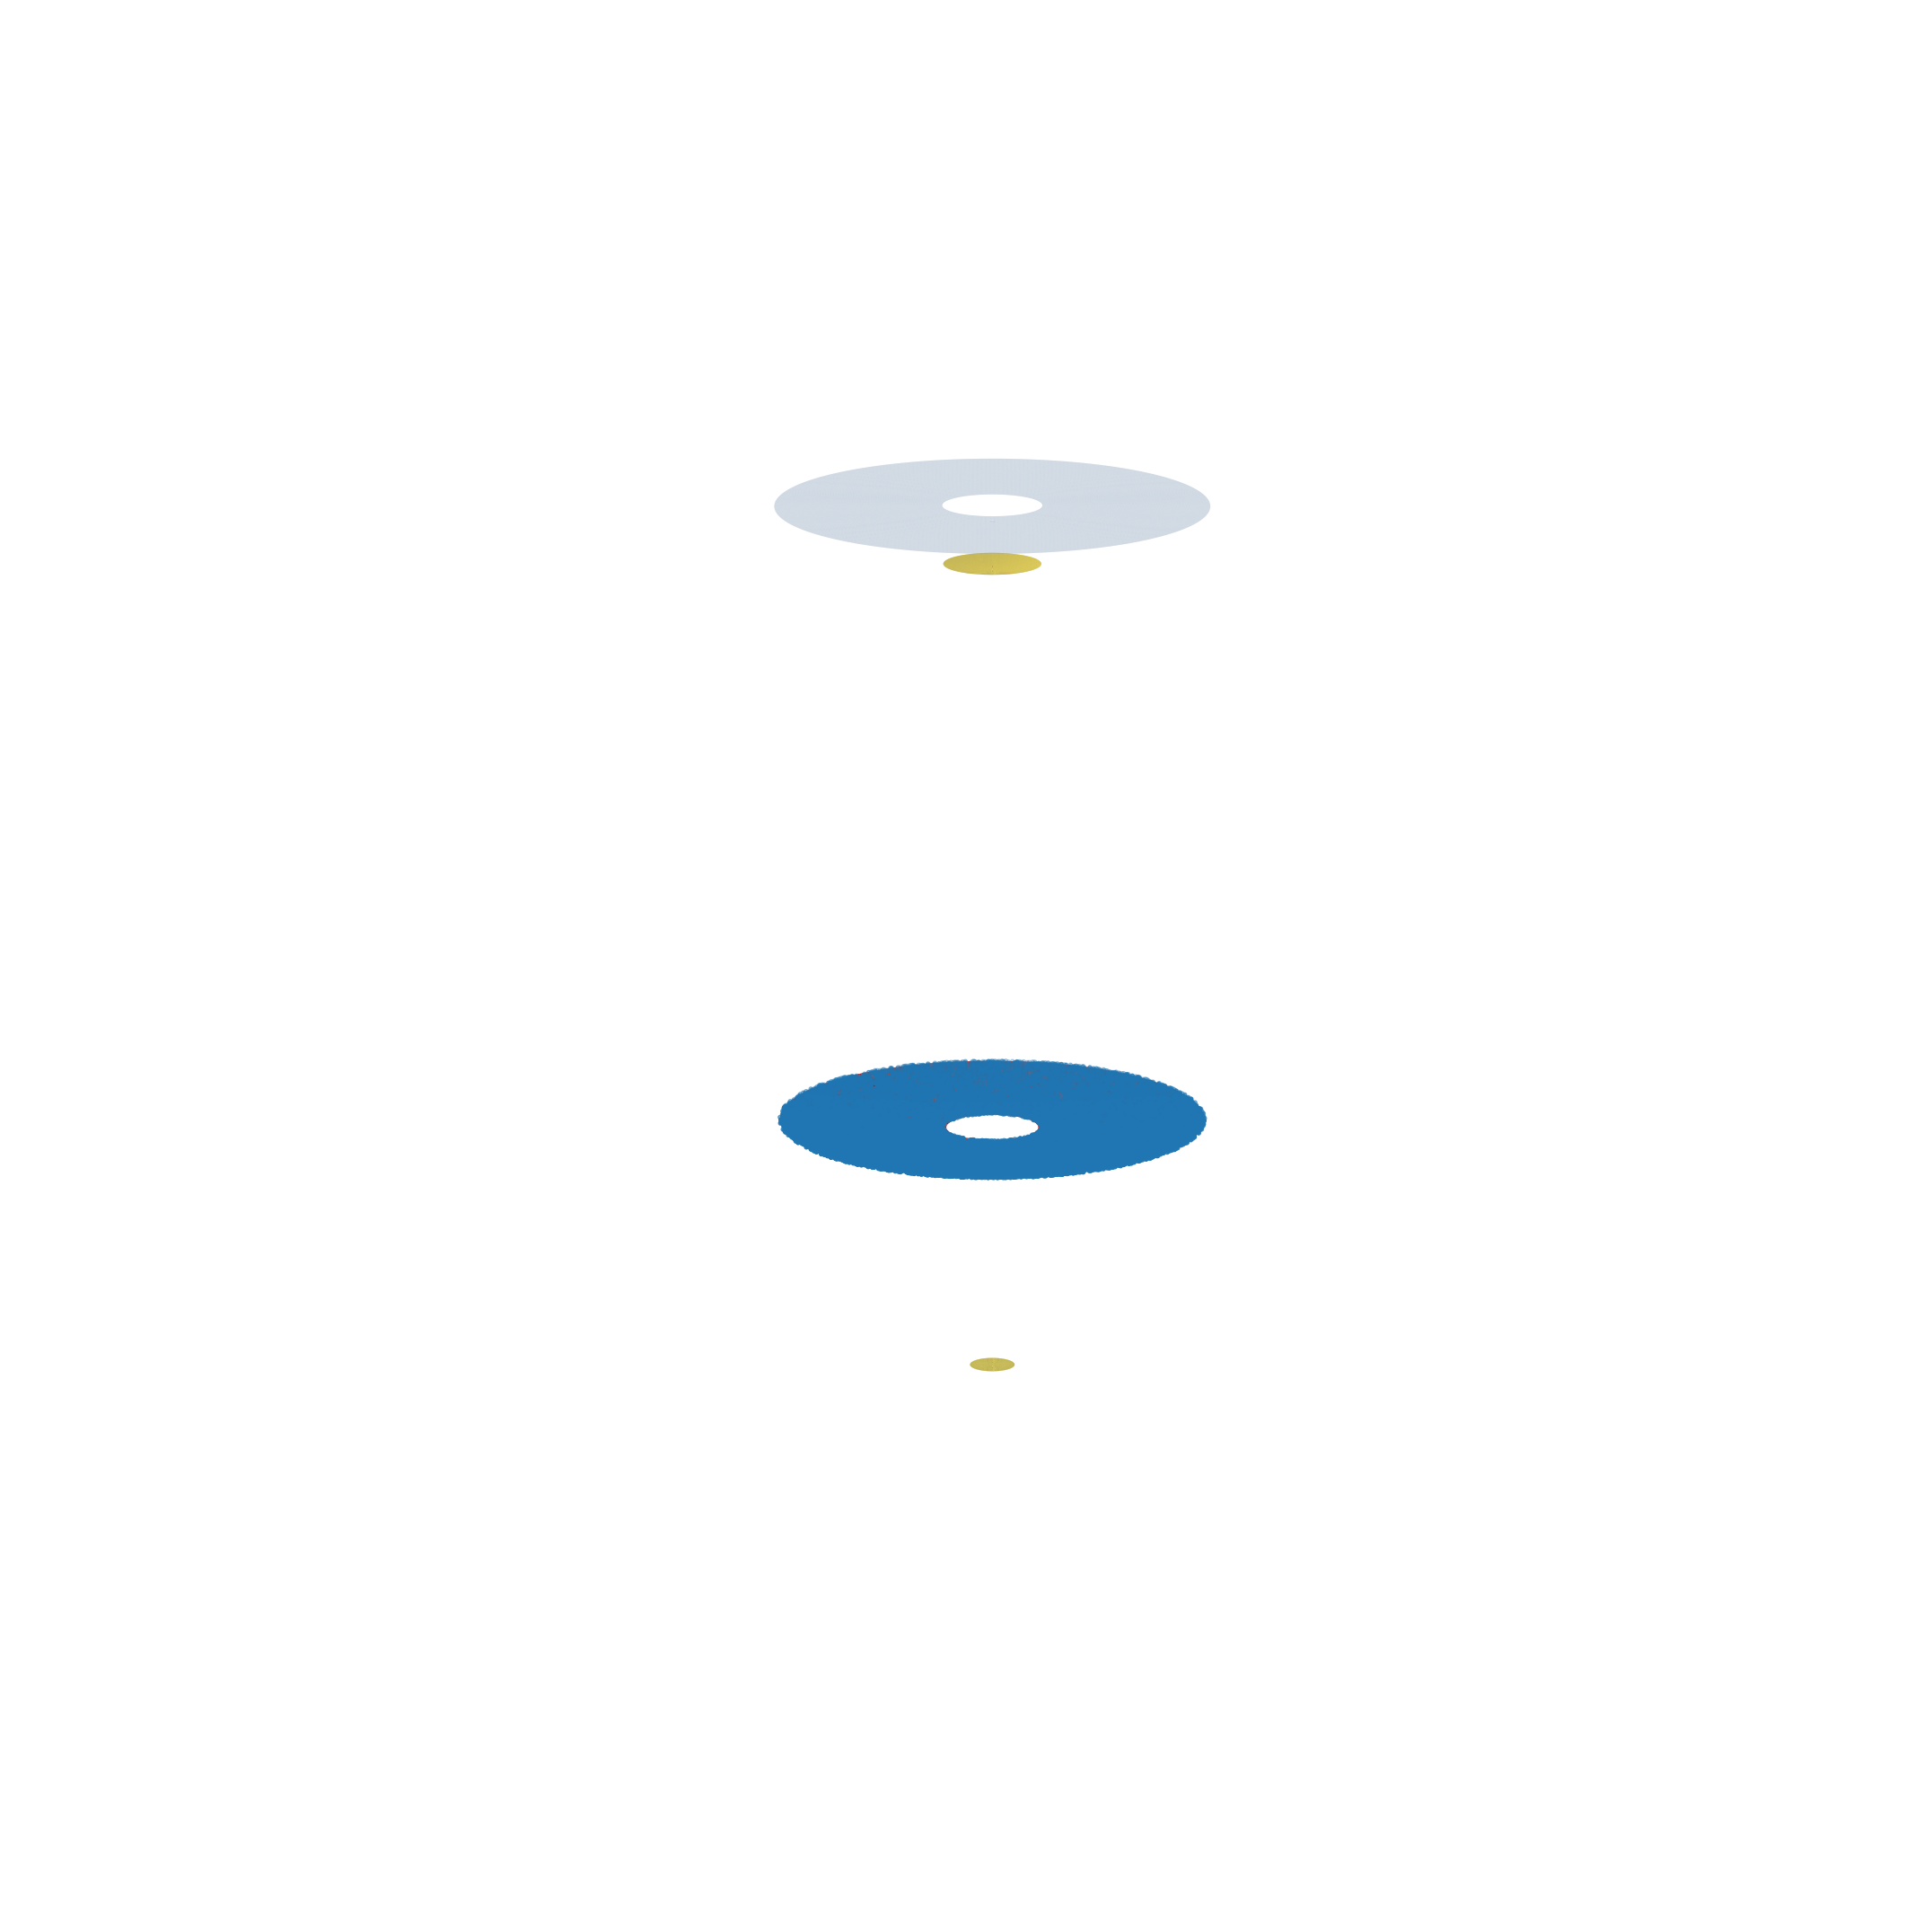

In [13]:
# 寻找入瞳，孔径光阑为主镜，因而入瞳及孔径光阑本身，与主镜重合。
tel=op.CassegrainReflector()
opn=op.OpticalPathNetwork(tel)
n=opn.find_pupil(
    'entrance', 
    perturb_dist=(1e-6,1.,1e-2,1e-6), 
    batch_rays=10000, 
    min_samplings=10000)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.')
trigs,zs,extent=tel.draw(nside=128,axes=ax,view_angles=(15,0))

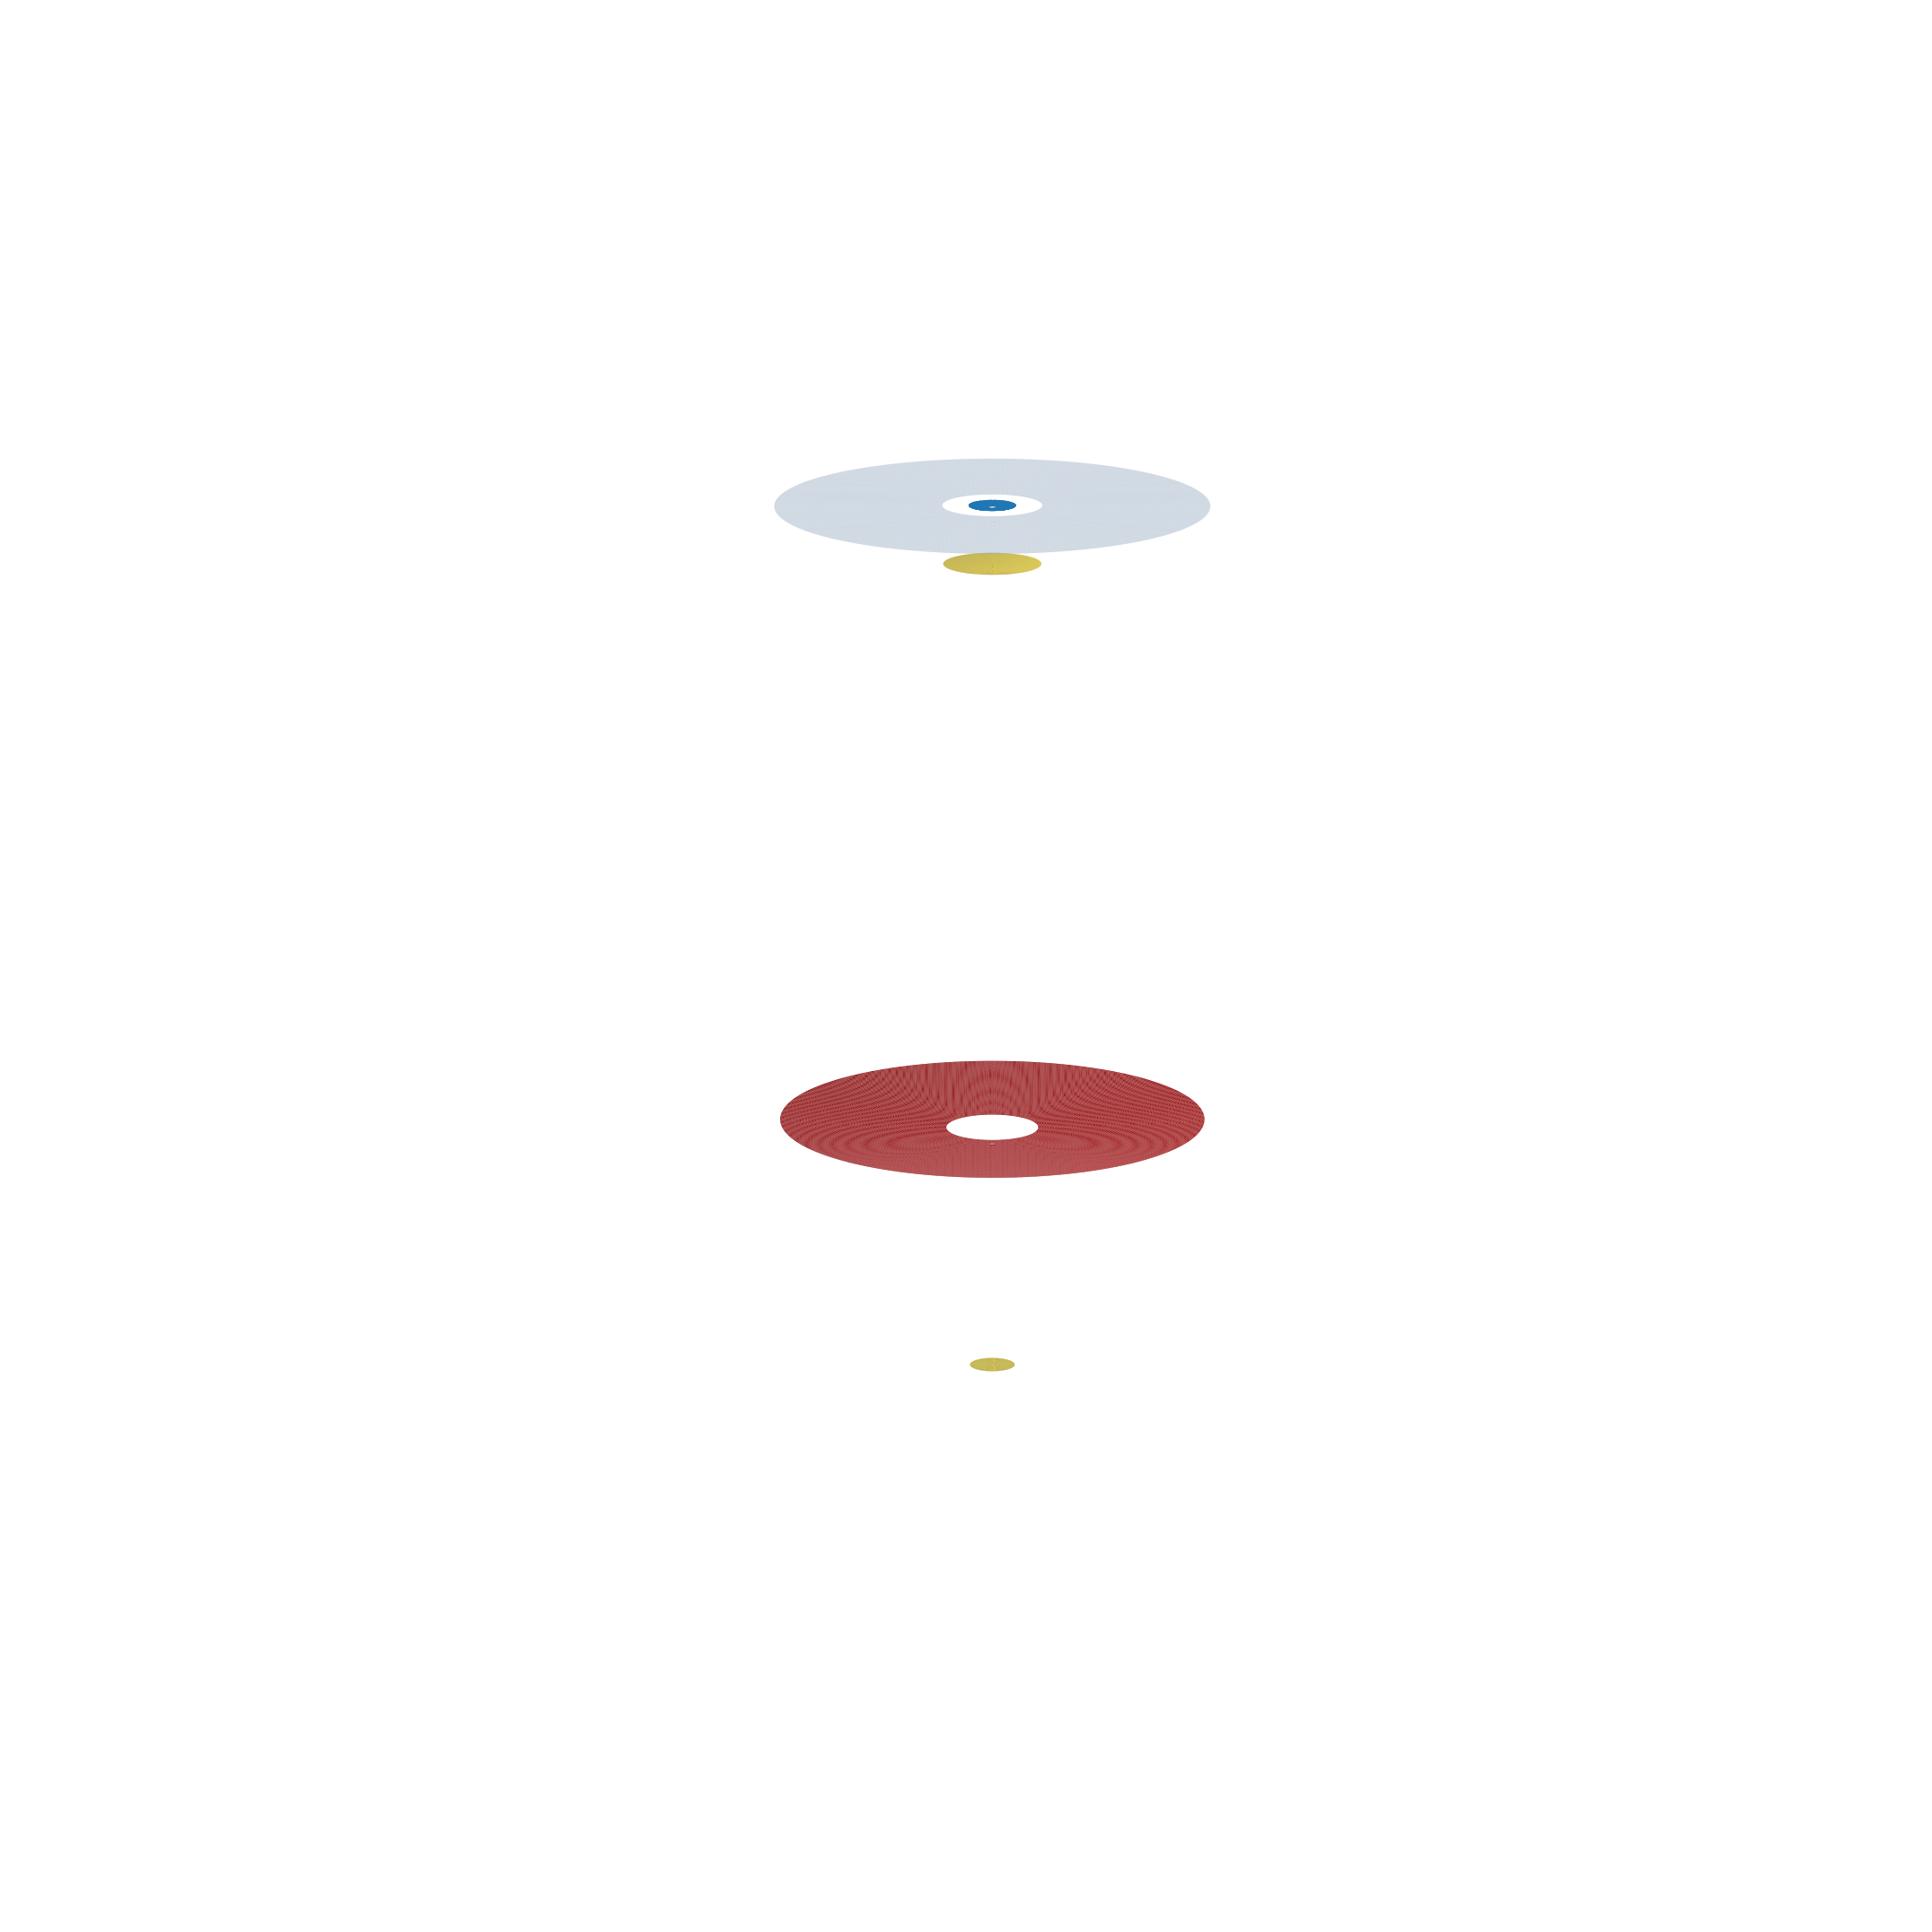

In [15]:
# 寻找出瞳，由下图可见，系统出瞳位于主镜的焦点附近（蓝色散点图标记）。
tel=op.CassegrainReflector()
opn=op.OpticalPathNetwork(tel)
n=opn.find_pupil(
    'exit', 
    perturb_dist=(1e-6,1.,1e-2,1e-6), 
    batch_rays=10000, 
    min_samplings=10000)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=tel.draw(nside=128,axes=ax,view_angles=(15,0))

### 干涉仪系统出瞳

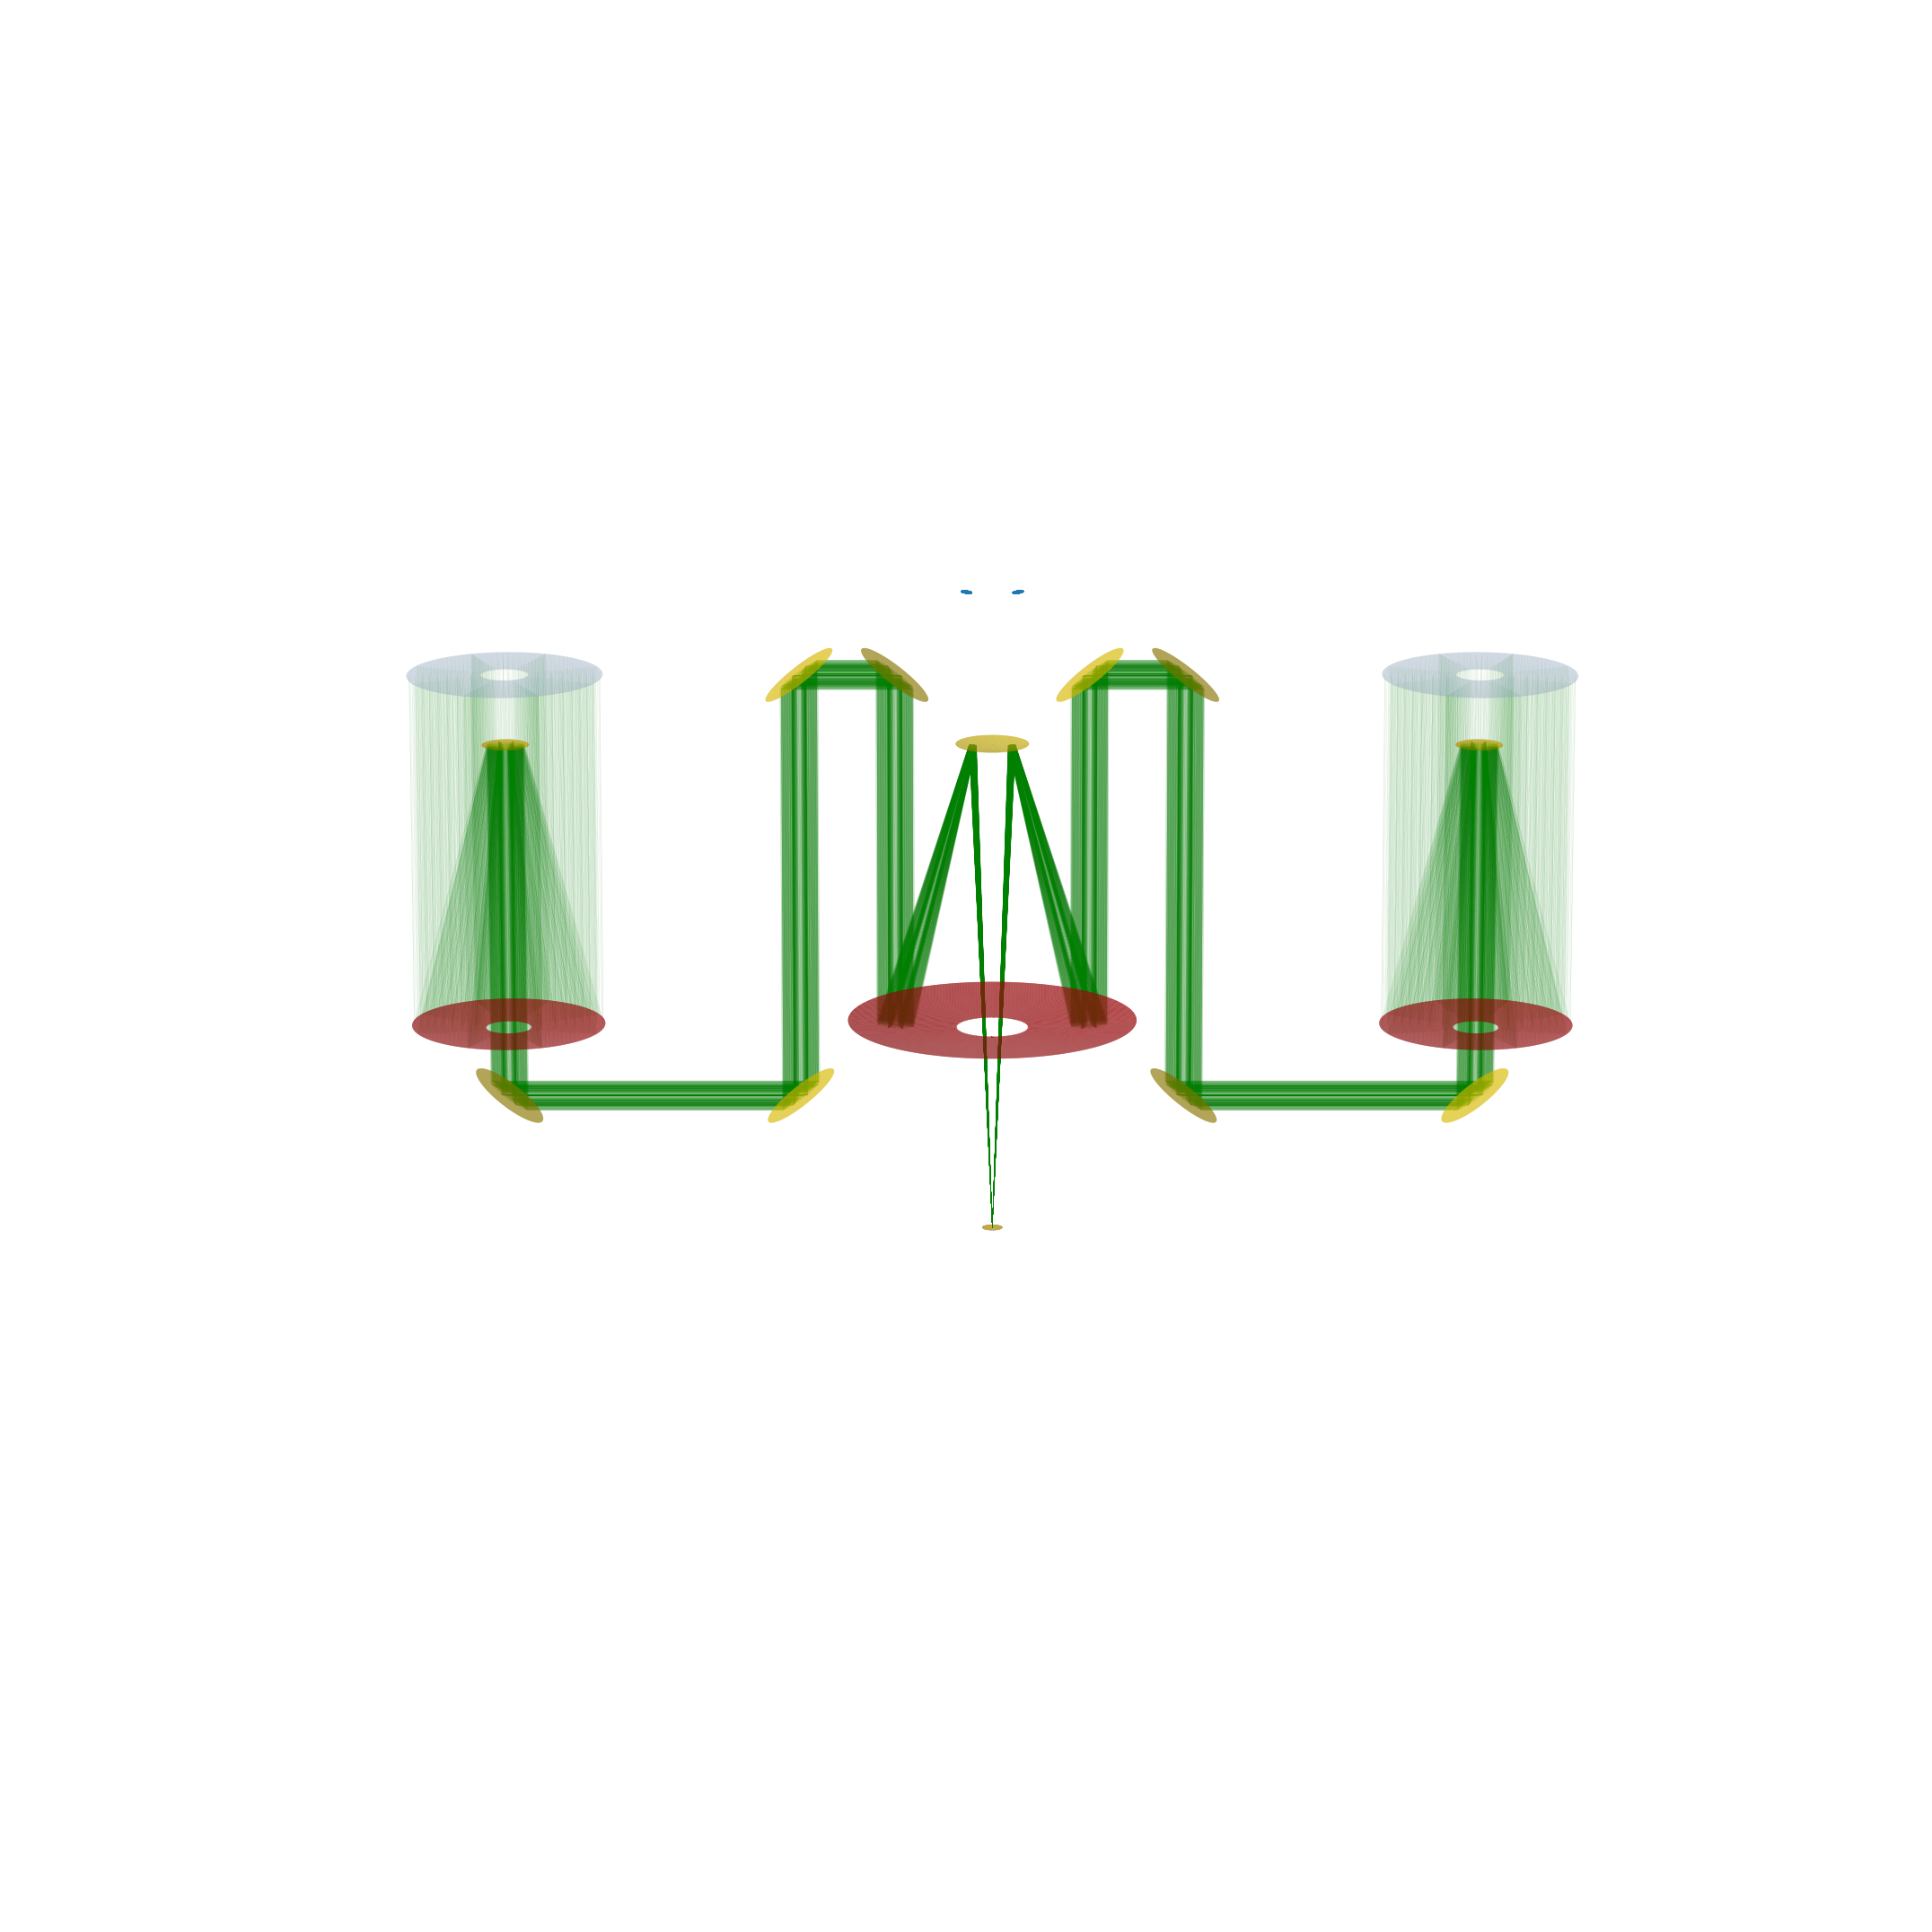

In [16]:
sim=op.SIM(init_b=10)
src=op.LightSource((0,0,np.inf))
_,q=src(sim.get_entrance(),100,1,sampling='crosshair')
opn=op.OpticalPathNetwork(sim)
pt,mt=sim.trace_network(q,opn)
n=opn.find_pupil('exit',perturb_dist=(1e-6,1.,1e-3,1e-6),min_samplings=10000,batch_rays=10000,max_batches=100)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15., -90.),raytrace=pt)

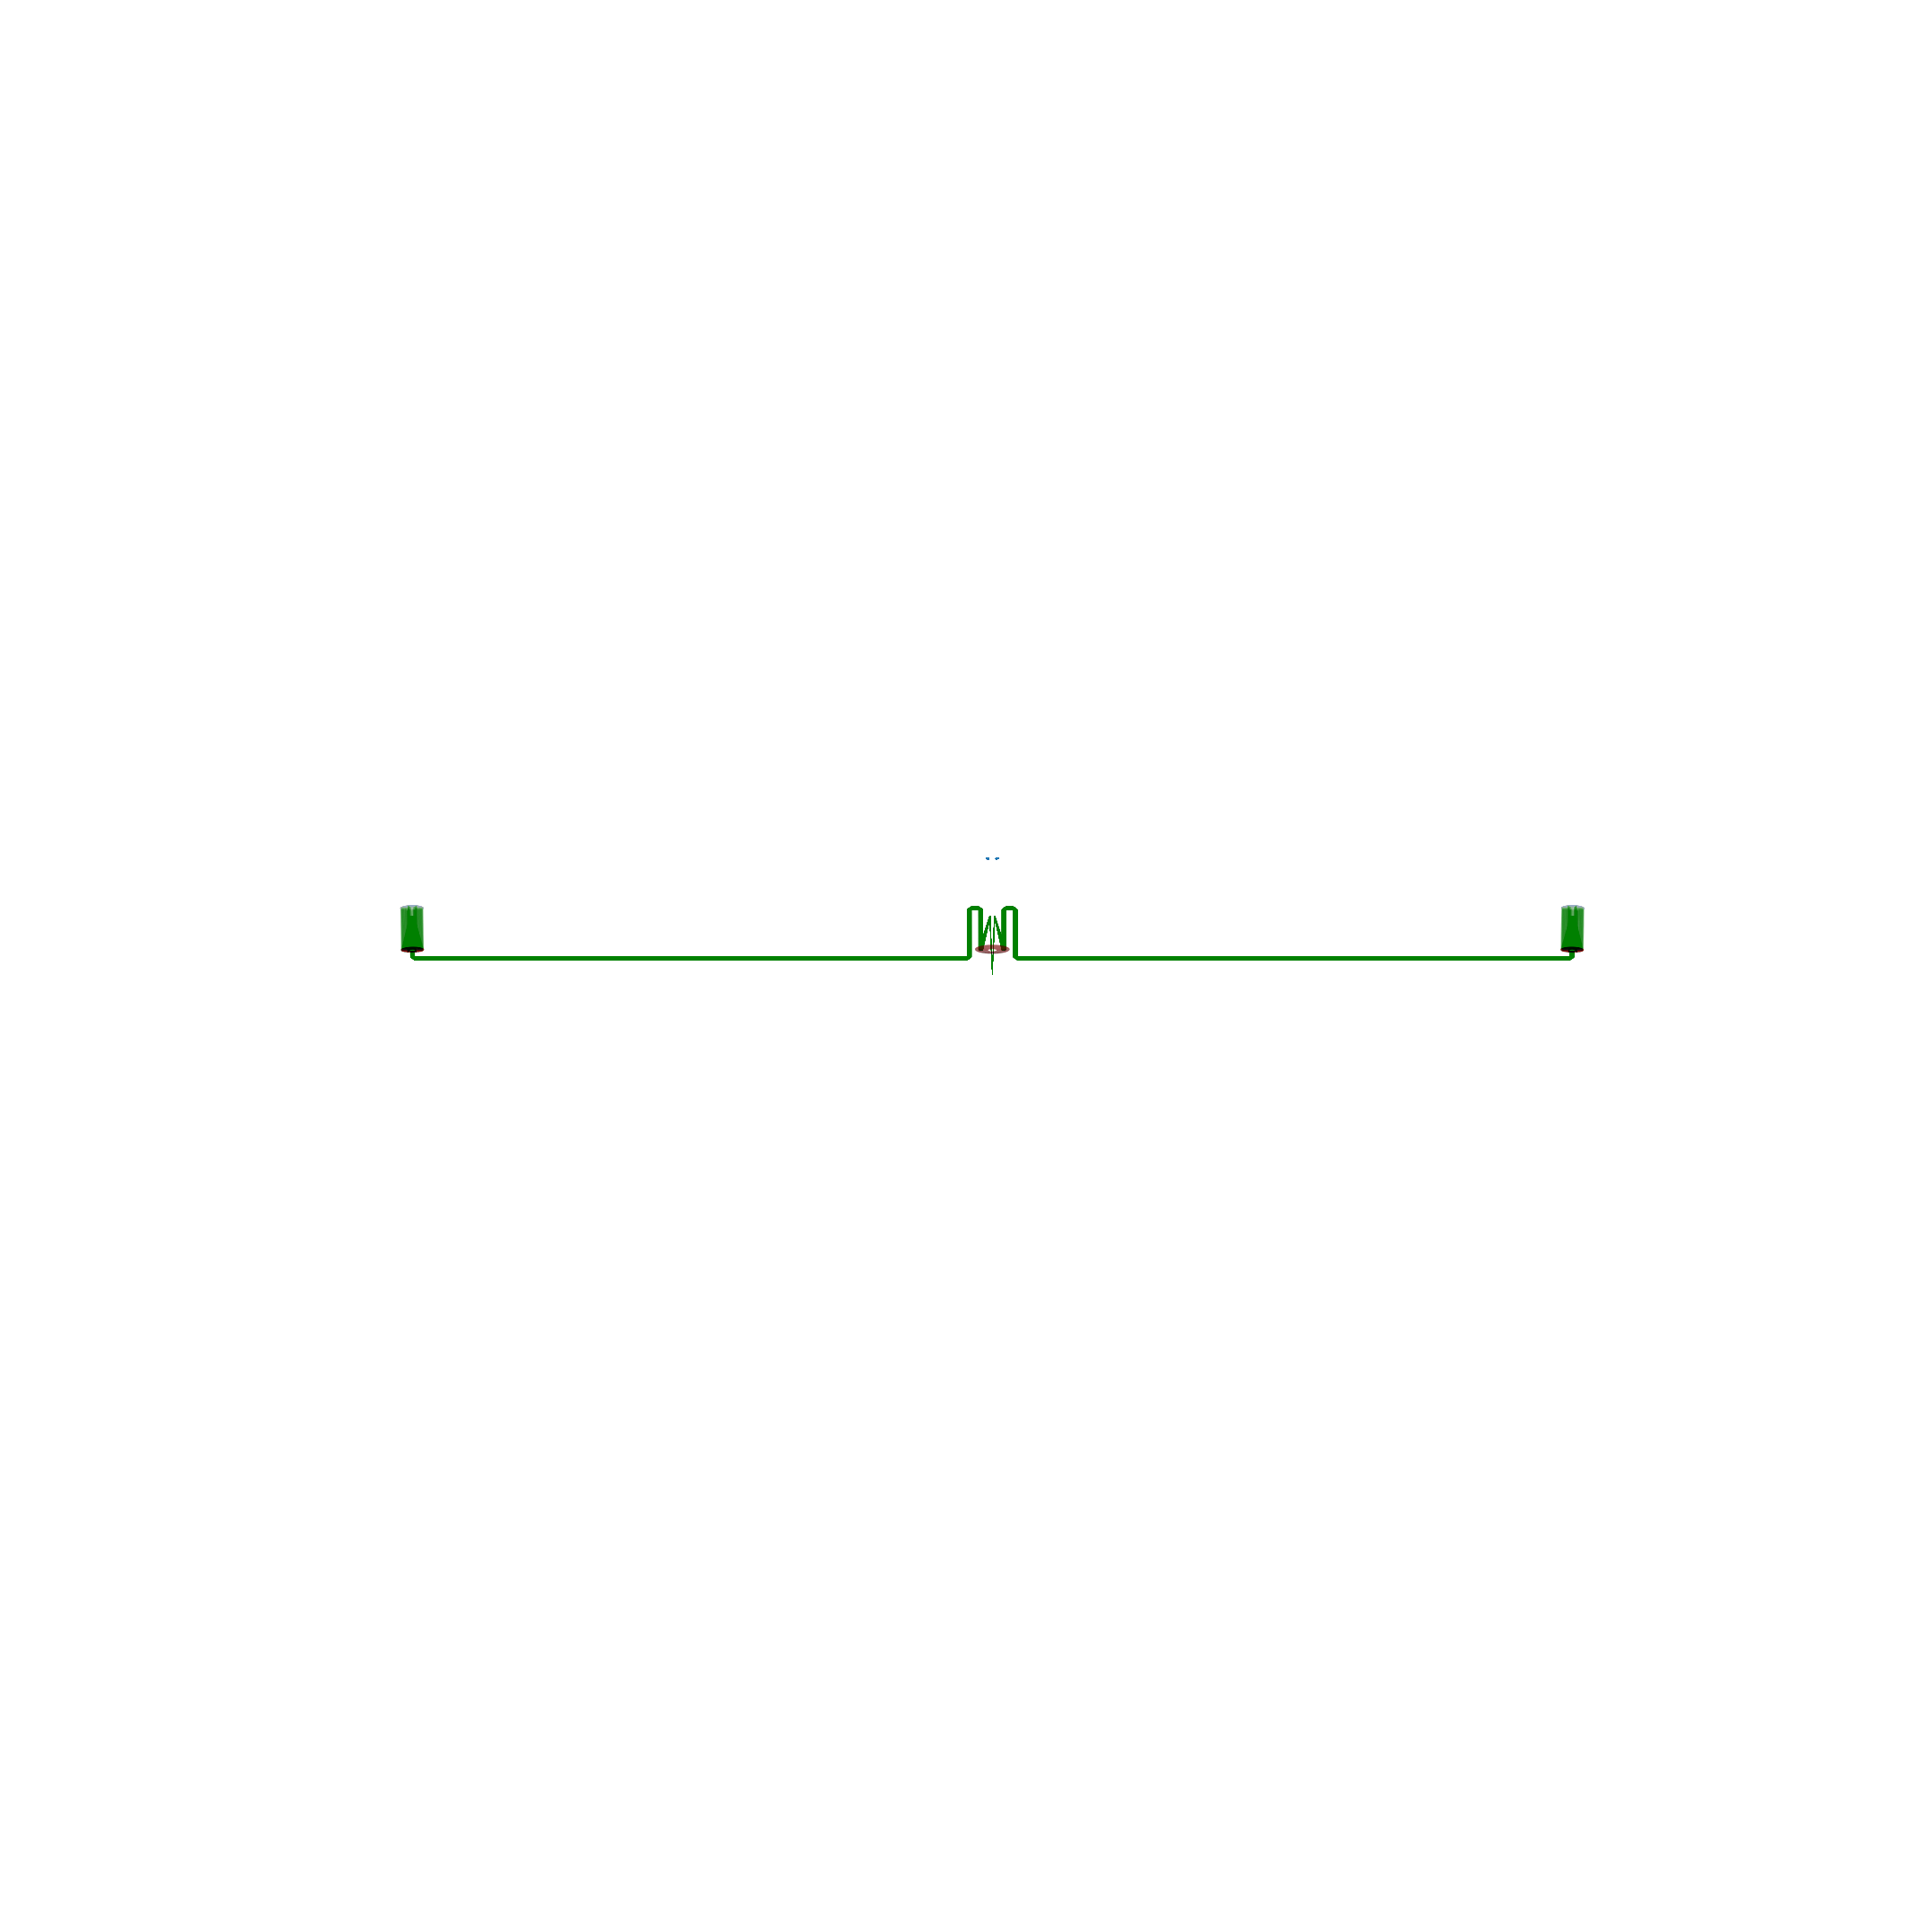

In [17]:
sim=op.SIM(init_b=100)
src=op.LightSource((0,0,np.inf))
_,q=src(sim.get_entrance(),100,1,sampling='crosshair')
opn=op.OpticalPathNetwork(sim)
pt,mt=sim.trace_network(q,opn)
n=opn.find_pupil('exit',perturb_dist=(1e-6,1.,1e-3,1e-6),min_samplings=10000,batch_rays=10000,max_batches=100)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15., -90.),raytrace=pt)

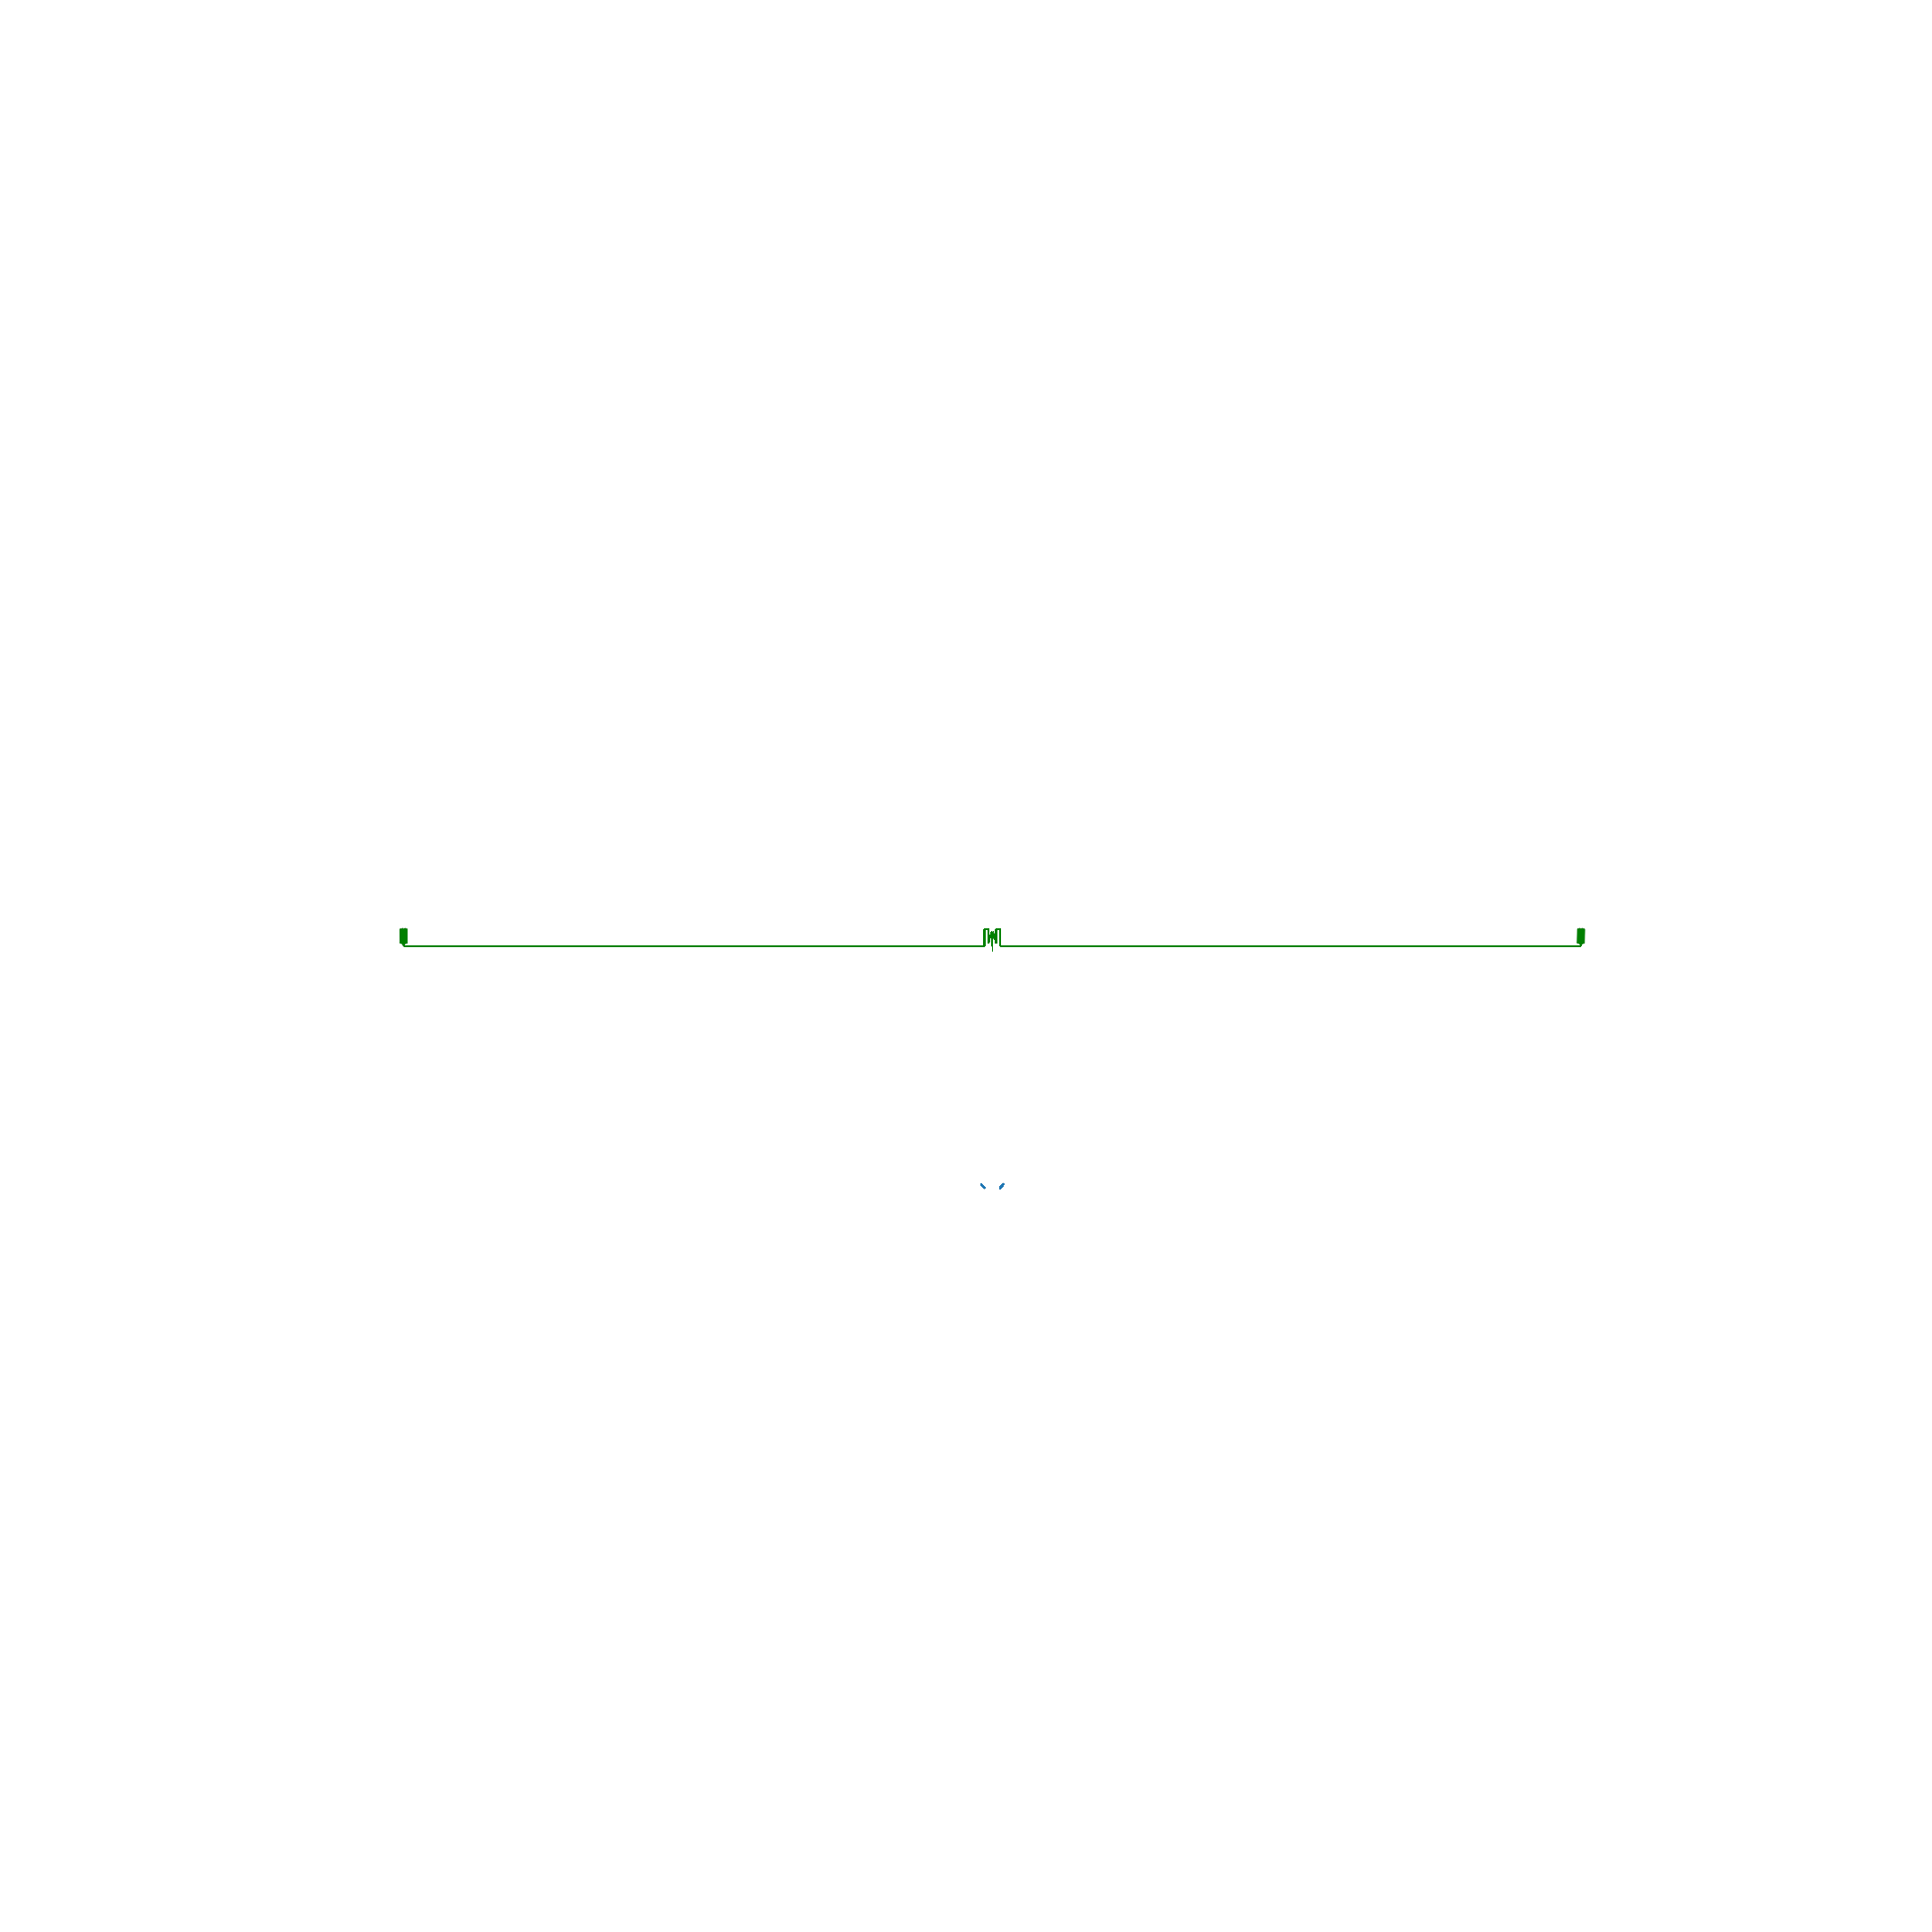

In [18]:
sim=op.SIM(init_b=300)
src=op.LightSource((0,0,np.inf))
_,q=src(sim.get_entrance(),100,1,sampling='crosshair')
opn=op.OpticalPathNetwork(sim)
pt,mt=sim.trace_network(q,opn)
n=opn.find_pupil('exit',perturb_dist=(1e-6,1.,1e-3,1e-6),min_samplings=10000,batch_rays=10000,max_batches=100)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15., -90.),raytrace=pt)

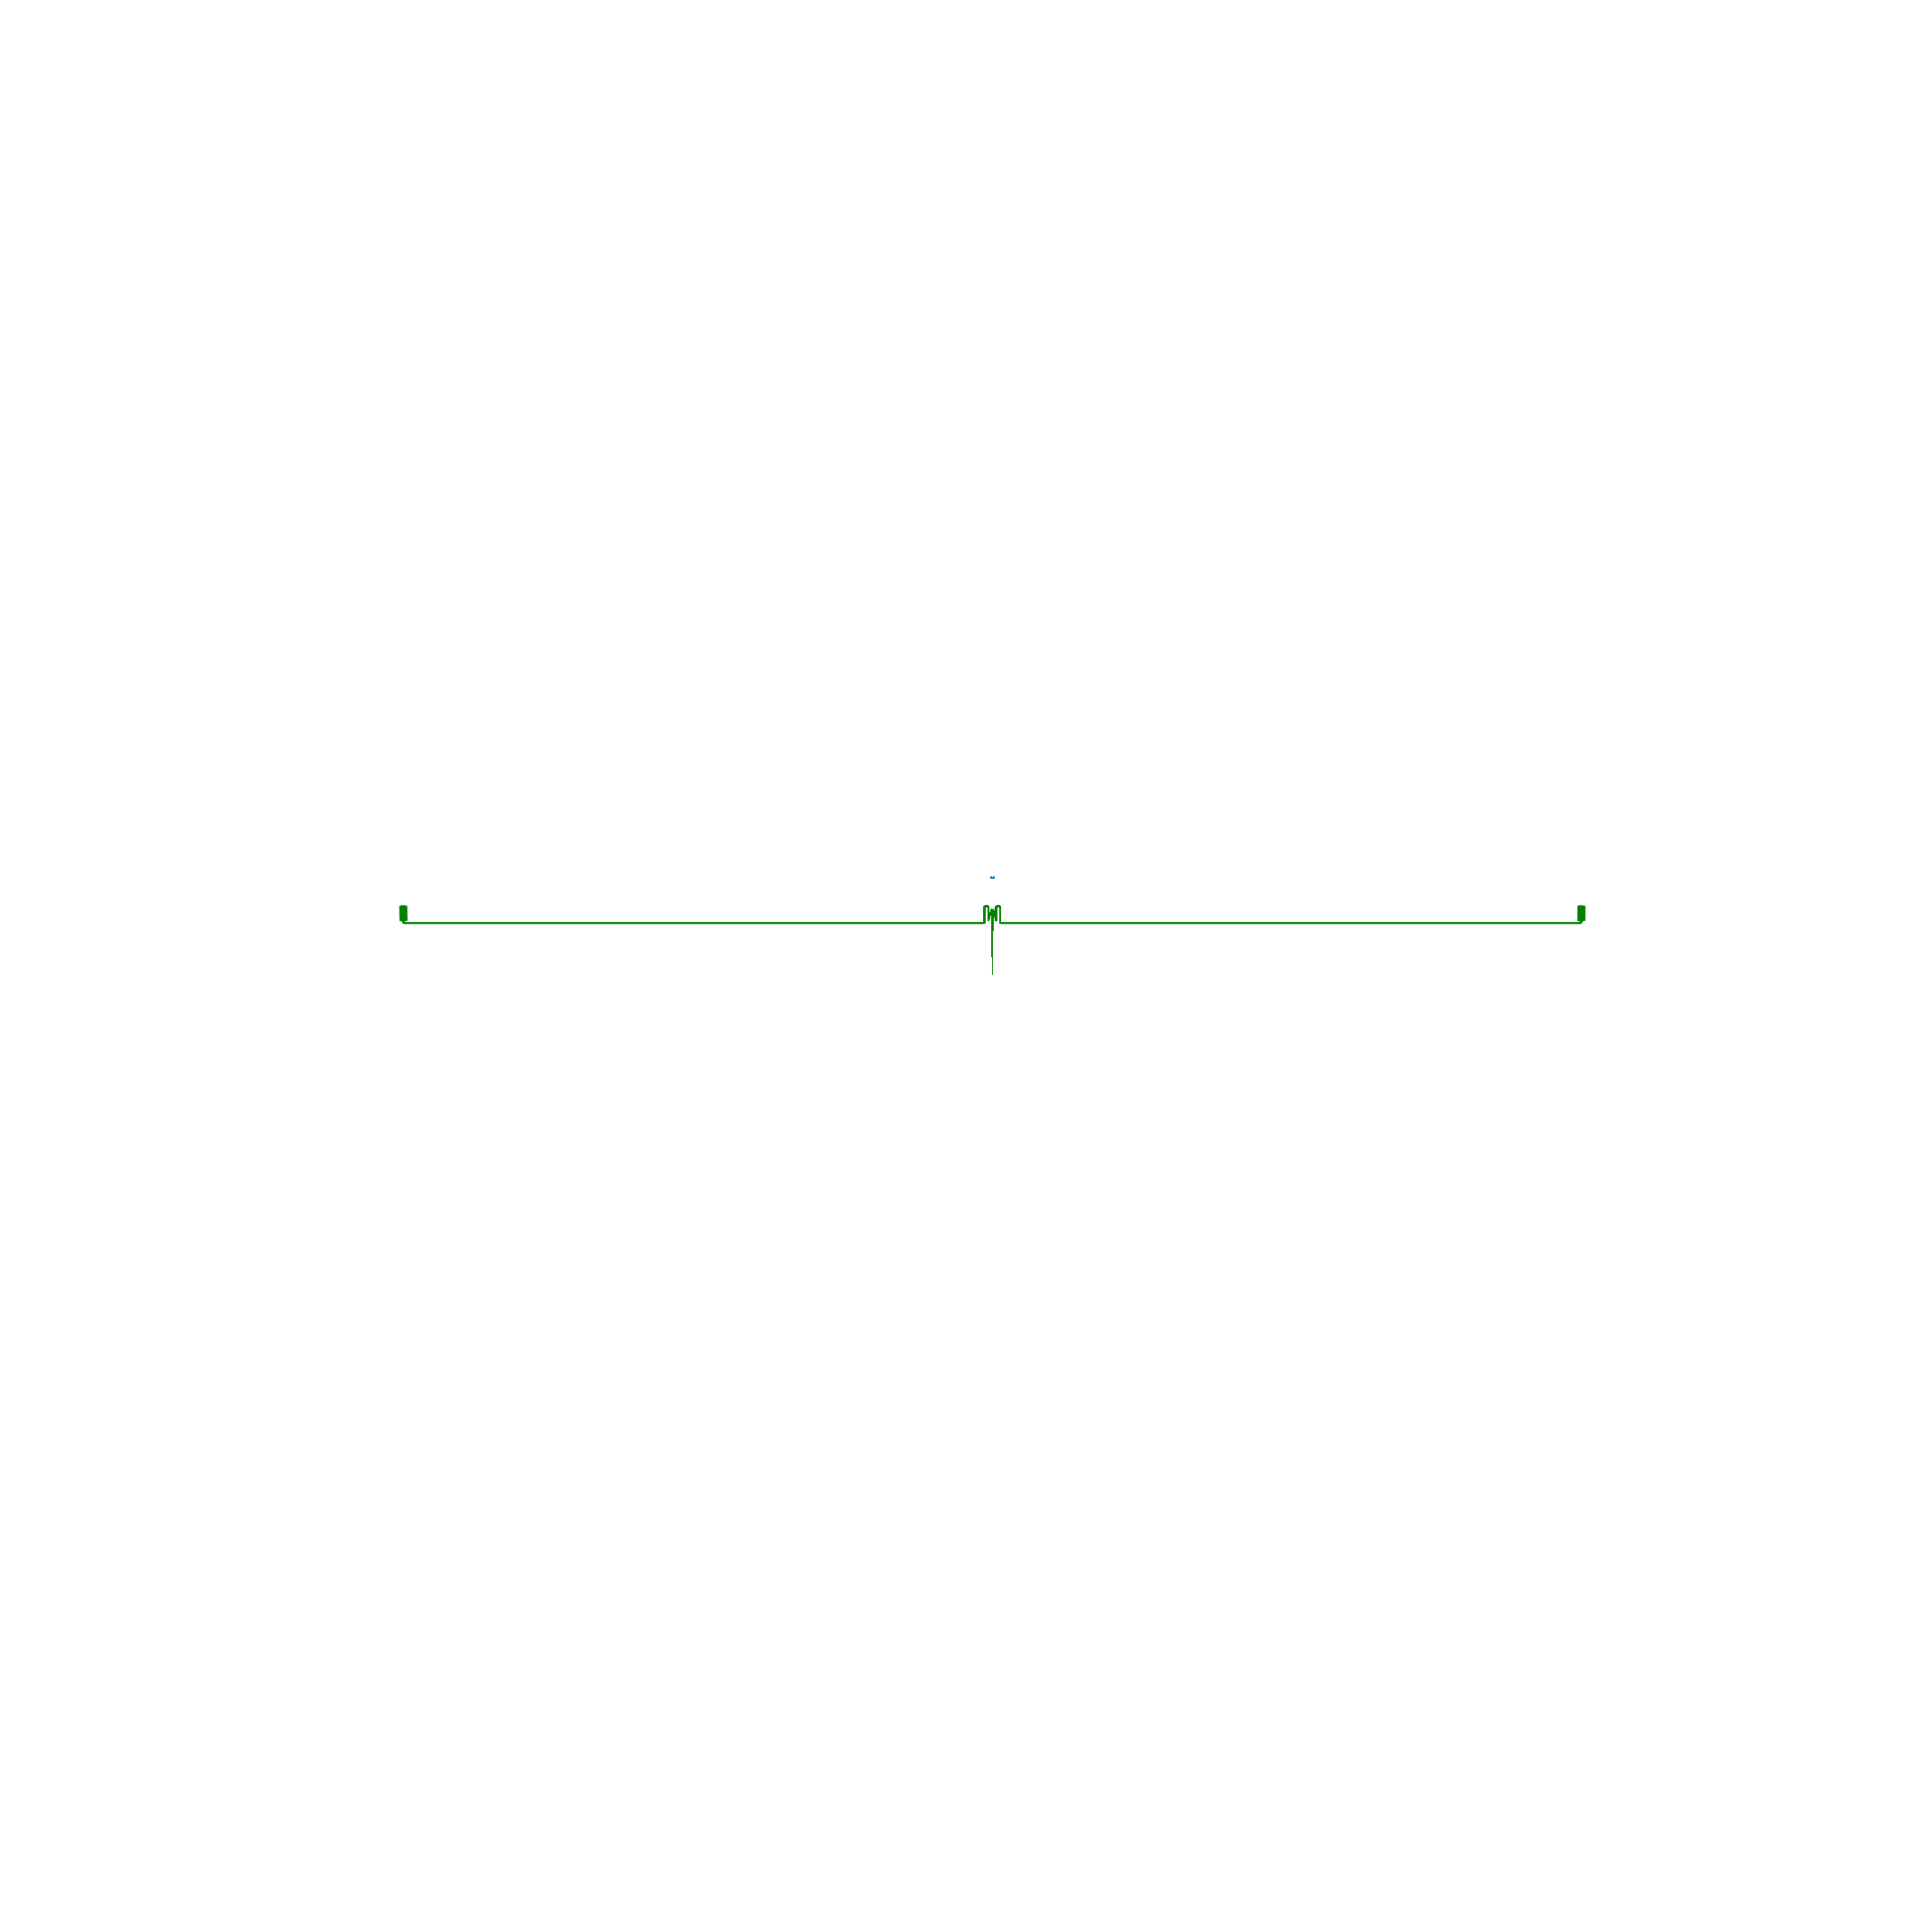

In [19]:
sim=op.SIM(init_b=300,detector_a=.5)
src=op.LightSource((0,0,np.inf))
_,q=src(sim.get_entrance(),100,1,sampling='crosshair')
opn=op.OpticalPathNetwork(sim)
pt,mt=sim.trace_network(q,opn)
n=opn.find_pupil('exit',perturb_dist=(1e-6,1.,1e-3,1e-6),min_samplings=10000,batch_rays=10000,max_batches=100)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(n[:,0],n[:,1],n[:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15., -90.),raytrace=pt)

观察上述实验发现，干涉仪系统出瞳情况相对复杂：
- 随着基线长度增加，出瞳面高度增加，出瞳倾斜程度增加；
- 基线长度超过一定阈值后，出瞳从物方虚像突变为像方实像；
- 增加合束器像方焦距，出瞳又从像方实像变成物方虚像。

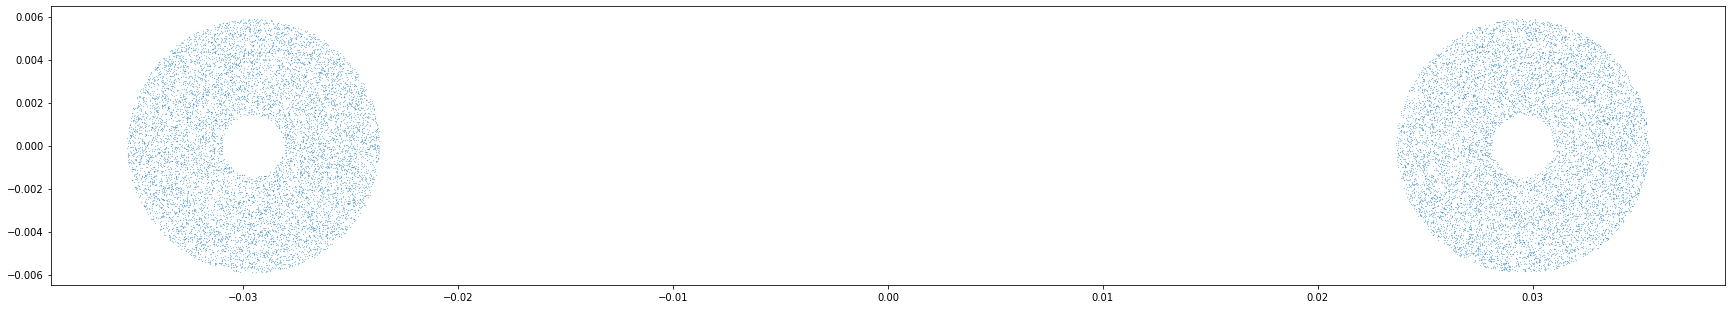

In [20]:
# 出瞳在参考球面上的投影
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111)
ax.scatter(n[:,0]/(n[:,2]),n[:,1]/(n[:,2]),.1,marker='.')
ax.set_aspect('equal')

In [546]:
reload(op)
tel=op.CassegrainReflector()
sim=op.SIM()
src=op.LightSource((0.,np.deg2rad(1./3600.),np.inf))
opn=op.OpticalPathNetwork(sim)
win,wout,m=opn.image(src,1e-3,verbose=True)

Re-calibrate the field of view...
Batch 0: 19667 object rays traced at exit.
Batch 0: 19669 reference rays traced at exit.
Batch 0: 19624 ray-pairs traced at exit.
Batch 0: 19624 points sampled at pupil, S-stat: 2.60E-17 (min), 1.06E-11 (avg), 4.46E-11 (max).
Entrance 0: 19546 triangles constructed.
Entrance 0: 19519 triangles selected.
Entrance 4: 19550 triangles constructed.
Entrance 4: 19530 triangles selected.


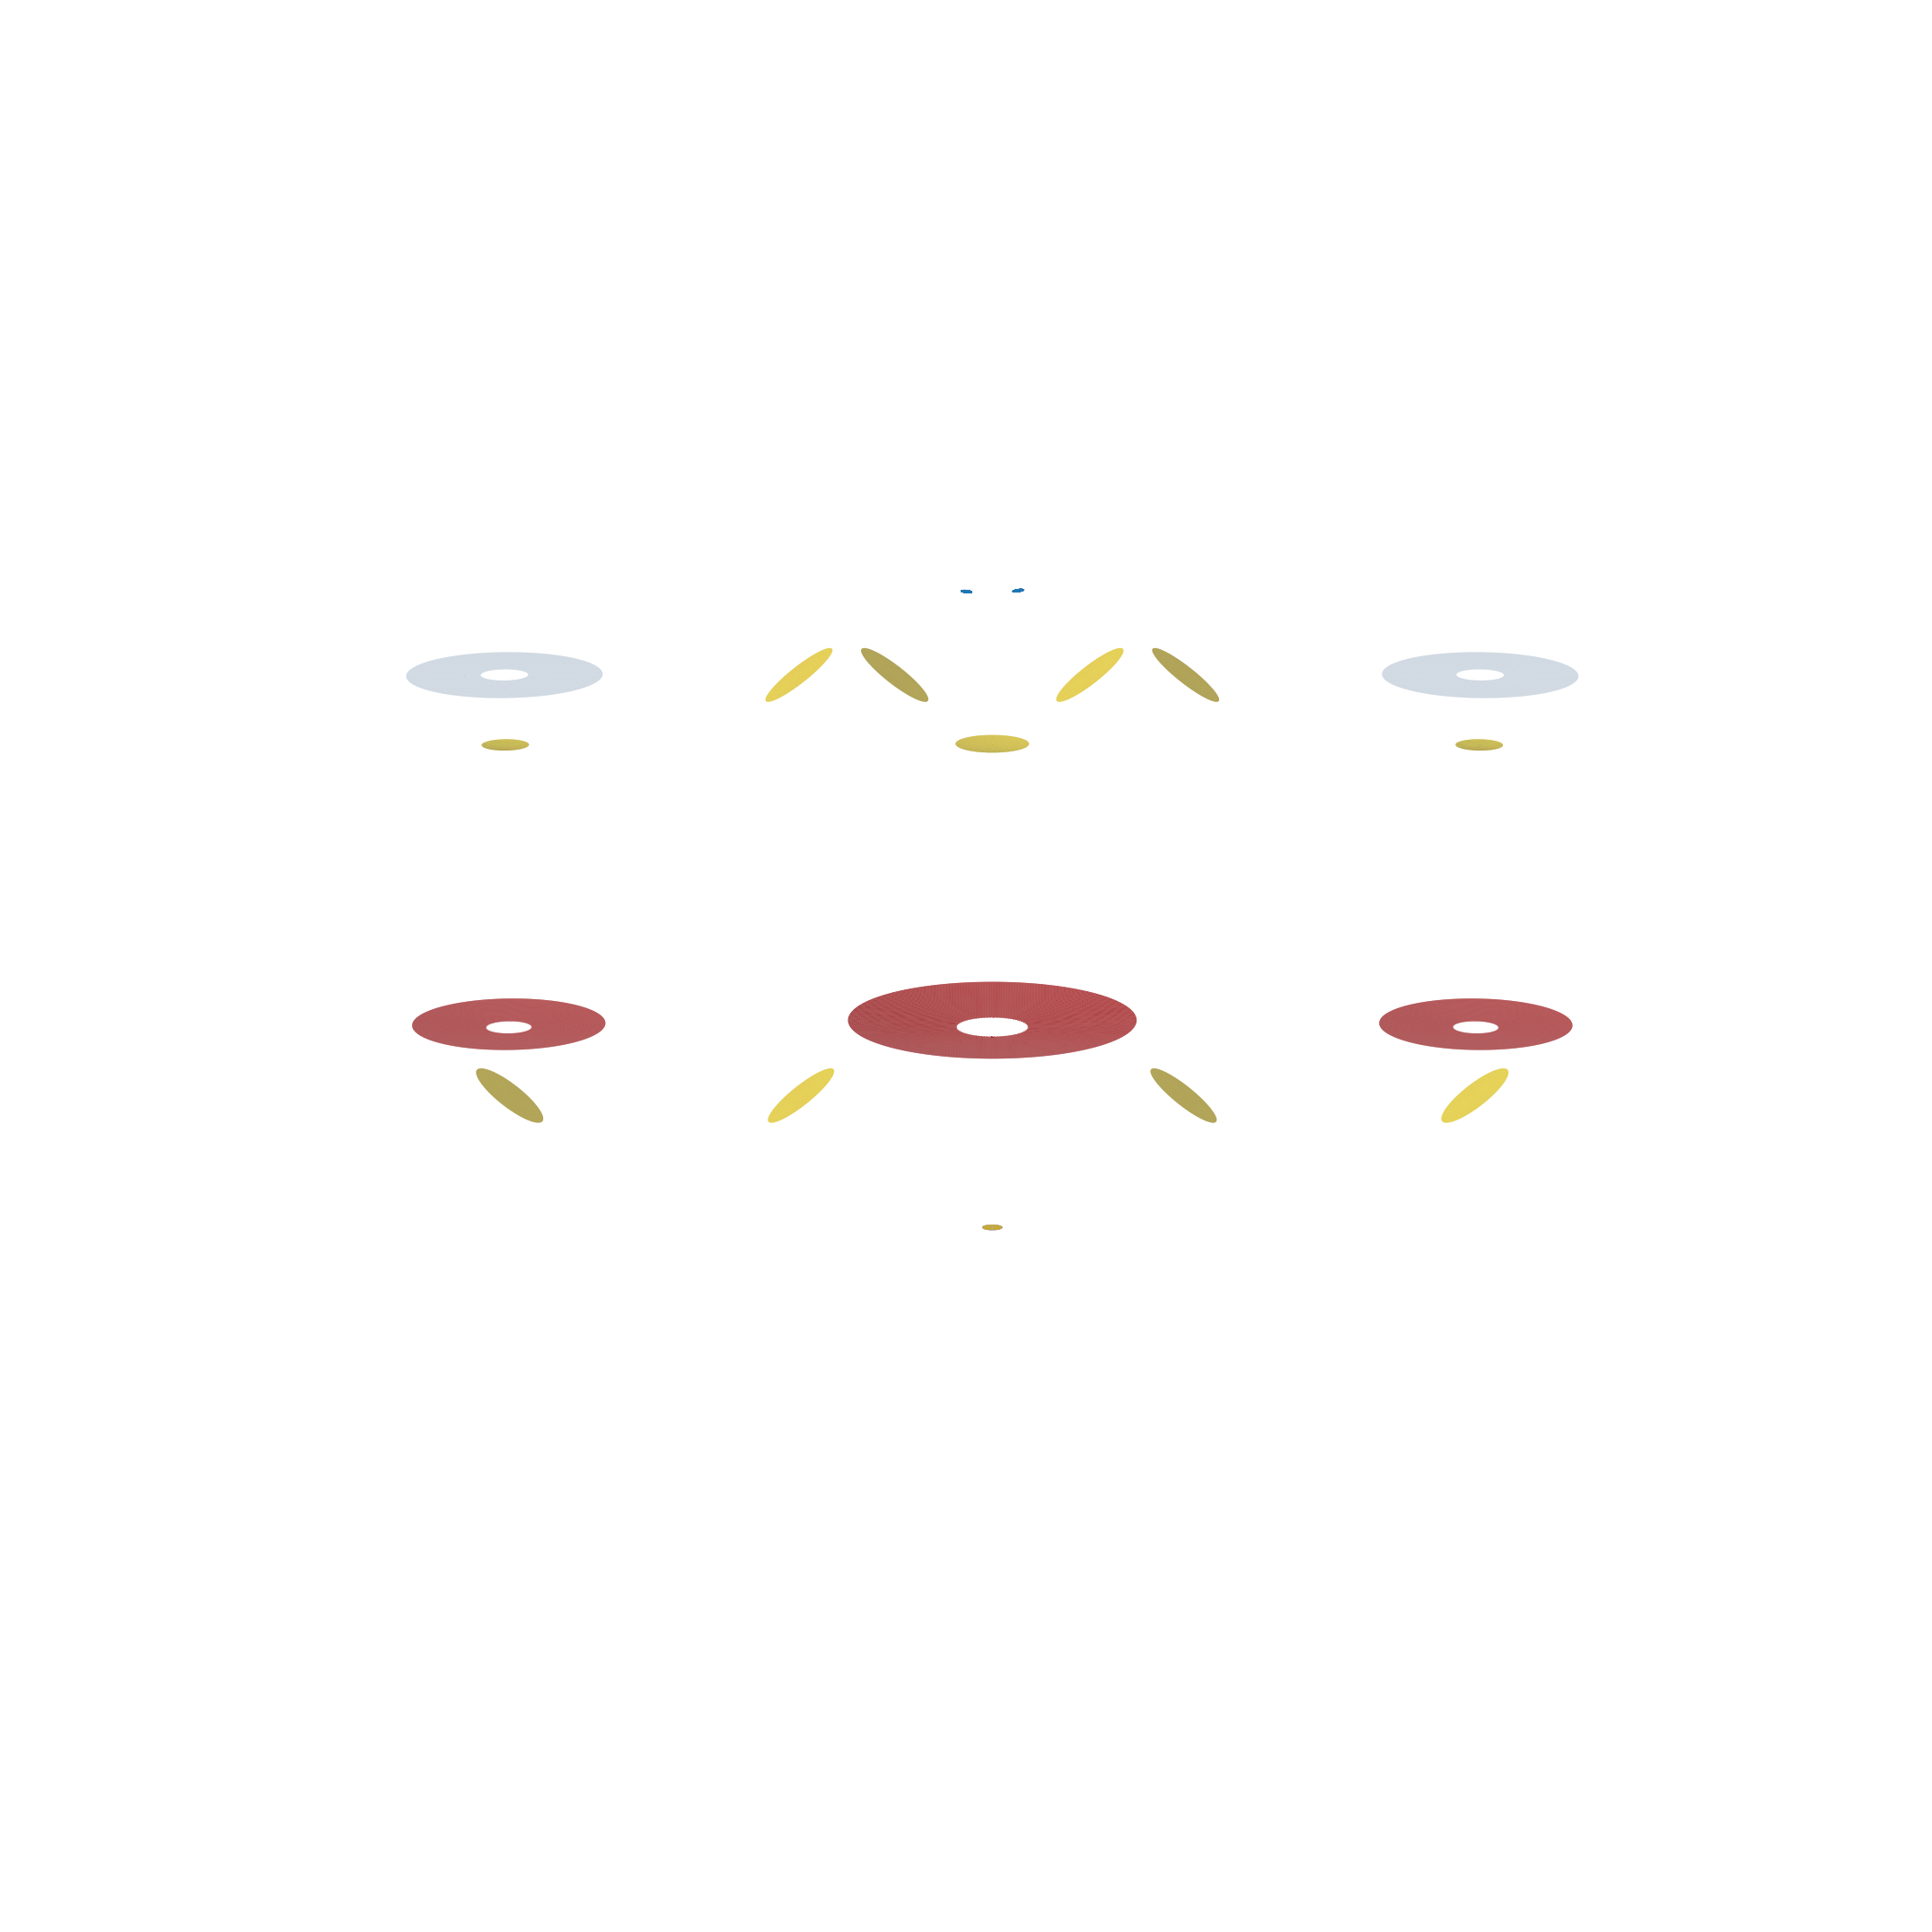

In [468]:
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(w['position'][:,0],w['position'][:,1],w['position'][:,2],'.',s=.1,alpha=0.2)
trigs,zs,extent=sim.draw(nside=128,axes=ax,view_angles=(15,-90))

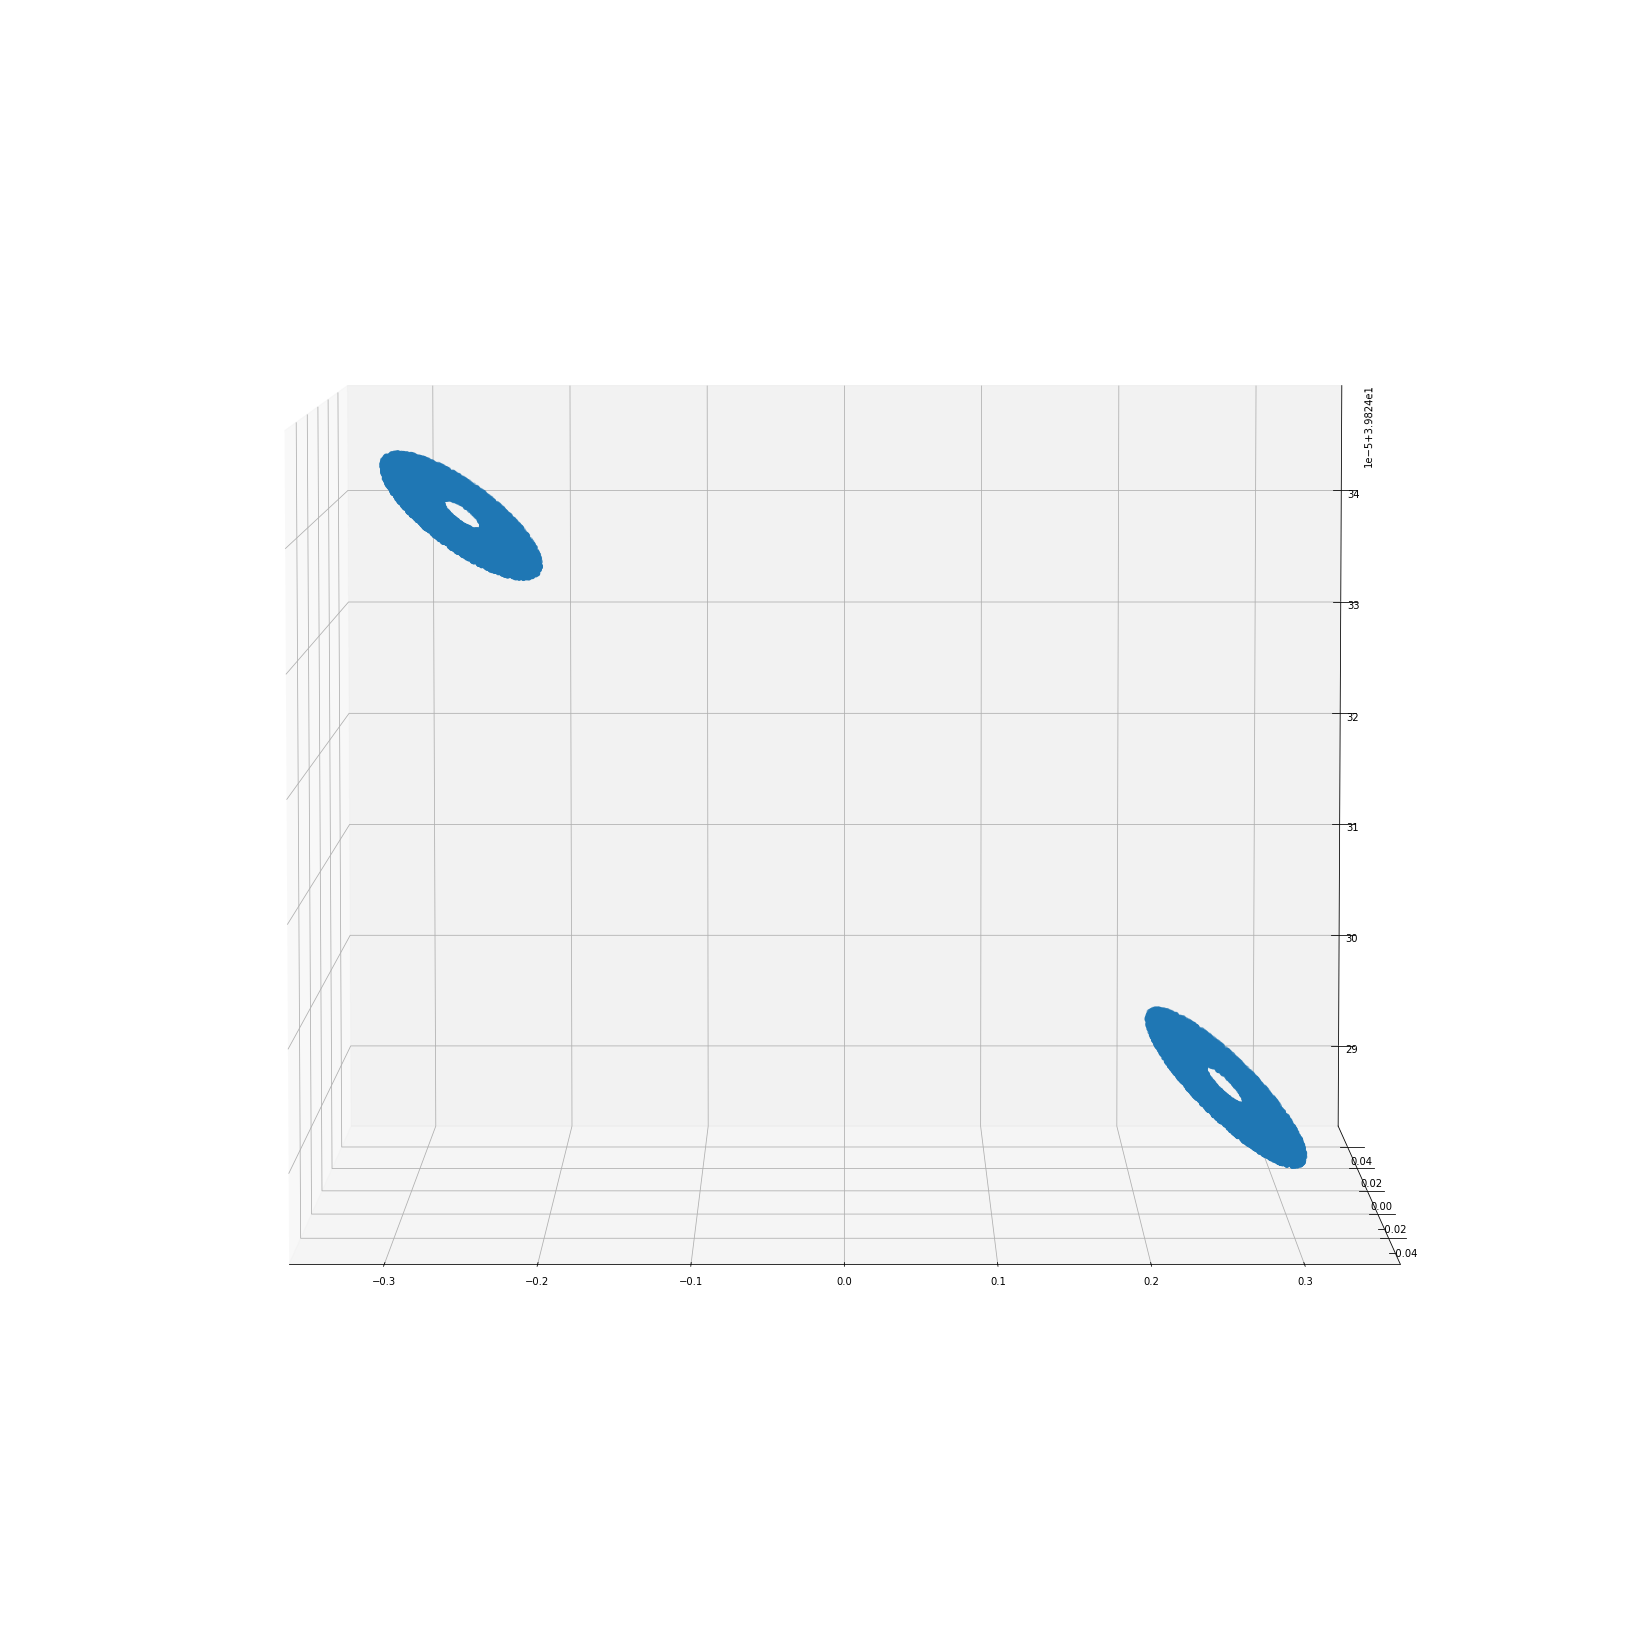

In [509]:
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(
    w['position'][:,0],
    w['position'][:,1],
    w['distance'][:]+np.sum((w['position']-np.reshape(sim.get_detectors()[0].p,(-1,3)))**2.,axis=-1)**.5)
ax.view_init(5.,-90.)

In [507]:
from scipy.spatial import Delaunay
tris=Delaunay(np.random.rand(10000,2),qhull_options="QJ")
print(tris.simplices.shape)
print(tris.coplanar)

(19971, 3)
[]


In [544]:
points=np.hstack([np.zeros((10000,1)),np.ones((10000,1)),np.ones((10000,1))*2.])
np.sum(points[tris.simplices],axis=1)/3.-sim.parts[0].p.reshape((-1,3))


array([[5., 1., 2.],
       [5., 1., 2.],
       [5., 1., 2.],
       ...,
       [5., 1., 2.],
       [5., 1., 2.],
       [5., 1., 2.]])

In [476]:
np.transpose(np.zeros((3,1)))

array([[0., 0., 0.]])

In [366]:
tel.area(precision=1e-4)

Re-calibrate the effective area...


2.978442217387705

In [377]:
np.arccos(0)

1.5707963267948966

In [379]:
src.direction

array([0., 0., 1.])